# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest

# Import Data

In [2]:
df = pd.read_csv('./data/NYC_Restaurant_Inspections_Data_Cleaned.csv')

In [3]:
df.shape

(120764, 105)

In [4]:
df.head()

,Unnamed: 0,CAMIS,DBA,BORO,ZIPCODE,CUISINE DESCRIPTION,INSPECTION MONTH,INSPECTION YEAR,FLAG__Critical,FLAG__Not Critical,...,VIOLATION__20E,VIOLATION__20F,VIOLATION__22A,VIOLATION__22B,VIOLATION__22C,VIOLATION__22E,VIOLATION__None,VIOLATION__Other,SCORE,GRADE
0,0,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,Bakery,2,2016,1,1,...,0,0,0,0,0,0,0,0,10.0,1
1,1,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,Bakery,5,2017,1,1,...,0,0,0,0,0,0,0,0,7.0,1
2,2,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,Bakery,5,2018,0,2,...,0,0,0,0,0,0,0,0,5.0,1
3,3,30112340,WENDY'S,BROOKLYN,11225.0,Hamburgers,3,2018,1,2,...,0,0,0,0,0,0,0,0,12.0,1
4,4,30112340,WENDY'S,BROOKLYN,11225.0,Hamburgers,3,2019,1,2,...,0,0,0,0,0,0,0,0,13.0,1


In [5]:
# look at number of citations with null values for Score
df[df.SCORE.isnull()==True].shape

(2224, 105)

In [3]:
# drop them
data = df[df.SCORE.isnull() == False].copy()

In [7]:
# check shape - dropped 2224 observations
data.shape

(118540, 105)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118540 entries, 0 to 120763
Columns: 105 entries, Unnamed: 0 to GRADE
dtypes: float64(2), int64(100), object(3)
memory usage: 95.9+ MB


# Exploratory Data Analysis

### Correlation Evaluation

In [9]:
# only looking at the pairs that have correlations above 0.5 or less than -0.5
data.corr()[(data.corr()>0.5) | (data.corr()<-0.5)]

,Unnamed: 0,CAMIS,ZIPCODE,INSPECTION MONTH,INSPECTION YEAR,FLAG__Critical,FLAG__Not Critical,VIOLATION__02A,VIOLATION__02B,VIOLATION__02C,...,VIOLATION__20E,VIOLATION__20F,VIOLATION__22A,VIOLATION__22B,VIOLATION__22C,VIOLATION__22E,VIOLATION__None,VIOLATION__Other,SCORE,GRADE
Unnamed: 0,1.000000,0.887583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CAMIS,0.887583,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZIPCODE,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INSPECTION MONTH,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INSPECTION YEAR,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG__Critical,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.799106,-0.538281
FLAG__Not Critical,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__02A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__02B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__02C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# only looking at the pairs that have correlations above 0.5 or less than -0.5 for the rest of the features which are not shown in the above matrix
data.corr()['VIOLATION__04G':'VIOLATION__15I'][(data.corr()>0.5) | (data.corr()<-0.5)]

,Unnamed: 0,CAMIS,ZIPCODE,INSPECTION MONTH,INSPECTION YEAR,FLAG__Critical,FLAG__Not Critical,VIOLATION__02A,VIOLATION__02B,VIOLATION__02C,...,VIOLATION__20E,VIOLATION__20F,VIOLATION__22A,VIOLATION__22B,VIOLATION__22C,VIOLATION__22E,VIOLATION__None,VIOLATION__Other,SCORE,GRADE
VIOLATION__04G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__05A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# only looking at the pairs that have correlations above 0.5 or less than -0.5 for the rest of the features which are not shown in the above matrix
data.corr().loc['VIOLATION__04G':'VIOLATION__15I', 'VIOLATION__04N':'VIOLATION__15I'][(data.corr()>0.5) | (data.corr()<-0.5)]

,VIOLATION__04N,VIOLATION__04O,VIOLATION__05A,VIOLATION__05B,VIOLATION__05C,VIOLATION__05D,VIOLATION__05E,VIOLATION__05F,VIOLATION__05H,VIOLATION__06A,...,VIOLATION__10B,VIOLATION__10C,VIOLATION__10D,VIOLATION__10E,VIOLATION__10F,VIOLATION__10G,VIOLATION__10H,VIOLATION__10I,VIOLATION__10J,VIOLATION__15I
VIOLATION__04G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04N,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04O,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__05A,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# only looking at the pairs that have correlations above 0.5 or less than -0.5 for the rest of the features which are not shown in the above matrix
data.corr().loc['VIOLATION__04G':'VIOLATION__15I', 'VIOLATION__05A':'VIOLATION__10B'][(data.corr()>0.5) | (data.corr()<-0.5)]

,VIOLATION__05A,VIOLATION__05B,VIOLATION__05C,VIOLATION__05D,VIOLATION__05E,VIOLATION__05F,VIOLATION__05H,VIOLATION__06A,VIOLATION__06B,VIOLATION__06C,...,VIOLATION__06I,VIOLATION__07A,VIOLATION__08A,VIOLATION__08B,VIOLATION__08C,VIOLATION__09A,VIOLATION__09B,VIOLATION__09C,VIOLATION__10A,VIOLATION__10B
VIOLATION__04G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.651625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__05A,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# only looking at the pairs that have correlations above 0.5 or less than -0.5 for the rest of the features which are not shown in the above matrix
data.corr().loc['VIOLATION__04G':'VIOLATION__15I', 'VIOLATION__06C':'VIOLATION__06I'][(data.corr()>0.5) | (data.corr()<-0.5)]

,VIOLATION__06C,VIOLATION__06D,VIOLATION__06E,VIOLATION__06F,VIOLATION__06G,VIOLATION__06H,VIOLATION__06I
VIOLATION__04G,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04H,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04I,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04J,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04K,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04L,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04M,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__04O,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIOLATION__05A,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data_sub = data[['ZIPCODE', 'INSPECTION MONTH', 'INSPECTION YEAR', 'FLAG__Critical', 'FLAG__Not Critical', 'SCORE', 'GRADE', 'VIOLATION__None']]

Text(0.5, 1.0, 'Correlation Heatmap of Key Features')

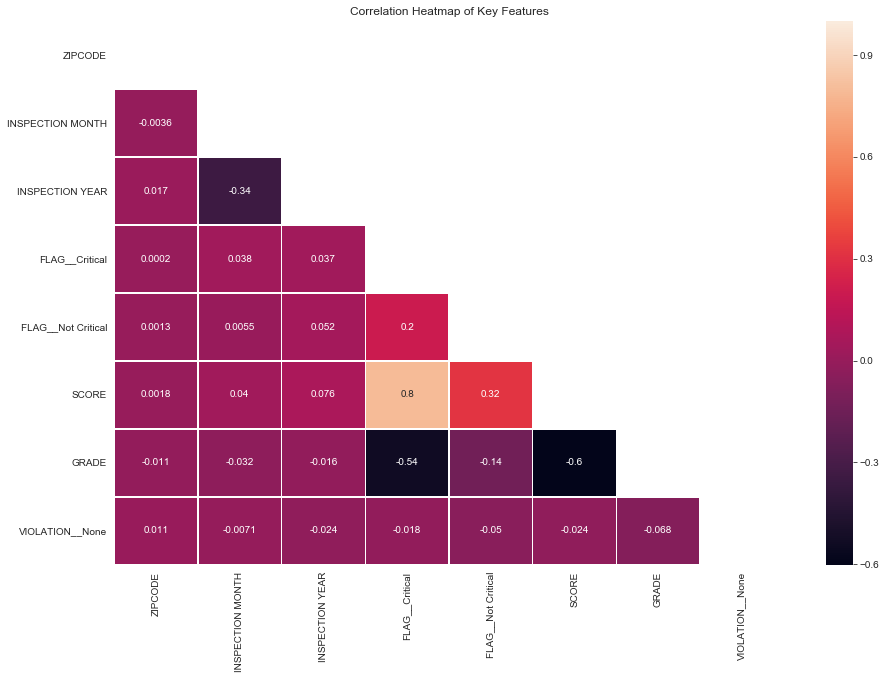

In [6]:
# correlation heatmap of some of the key features in dataframe
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
mask = np.zeros_like(data_sub.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data_sub.corr(), linewidth=0.5, mask=mask, annot=True)
plt.title('Correlation Heatmap of Key Features')

### Class Imbalance Evaluation

In [14]:
# view value_counts of Grade column (1 = received an A, 0 = did not receive an A)
data.GRADE.value_counts()

1    70515
0    48025
Name: GRADE, dtype: int64

Text(0.5, 1.0, 'Class Imbalance of Target Variable')

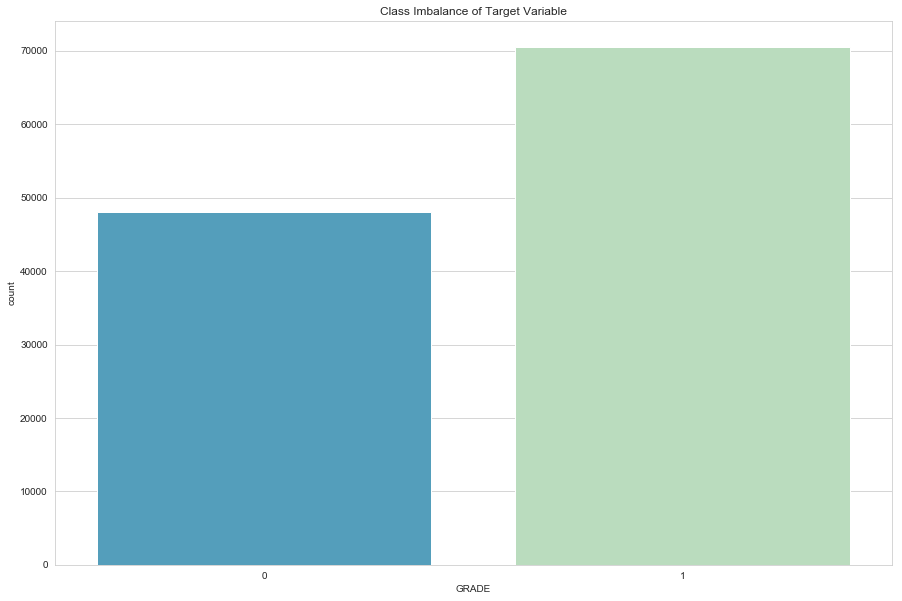

In [7]:
# visualize value counts of target column
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))
sns.countplot(x='GRADE',data=data,palette='GnBu_r')
plt.title('Class Imbalance of Target Variable')

### Outlier Evaluation

In [16]:
data.describe()

,Unnamed: 0,CAMIS,ZIPCODE,INSPECTION MONTH,INSPECTION YEAR,FLAG__Critical,FLAG__Not Critical,VIOLATION__02A,VIOLATION__02B,VIOLATION__02C,...,VIOLATION__20E,VIOLATION__20F,VIOLATION__22A,VIOLATION__22B,VIOLATION__22C,VIOLATION__22E,VIOLATION__None,VIOLATION__Other,SCORE,GRADE
count,118540.000000,1.185400e+05,118540.000000,118540.000000,118540.000000,118540.000000,118540.000000,118540.000000,118540.000000,118540.000000,...,118540.000000,118540.000000,118540.000000,118540.000000,118540.000000,118540.000000,118540.000000,118540.000000,118540.000000,118540.000000
mean,60750.560267,4.574628e+07,10672.398212,6.081373,2017.374599,1.740720,1.368677,0.002328,0.165472,0.003729,...,0.000911,0.014704,0.006293,0.000346,0.013337,0.001029,0.025240,0.021621,14.954397,0.594862
std,34871.709069,4.425225e+06,595.727239,3.423076,1.058624,1.338638,1.059516,0.048197,0.378847,0.060949,...,0.030171,0.123411,0.079080,0.018595,0.115082,0.032065,0.161153,0.159657,10.783543,0.490921
min,0.000000,3.007544e+07,10000.000000,1.000000,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,30569.750000,4.134843e+07,10022.000000,3.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
50%,61056.500000,5.000106e+07,10467.000000,6.000000,2018.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,1.000000
75%,90971.250000,5.004639e+07,11228.000000,9.000000,2018.000000,2.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,1.000000
max,120763.000000,5.009212e+07,12345.000000,12.000000,2019.000000,14.000000,14.000000,1.000000,2.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,3.000000,5.000000,166.000000,1.000000


Text(0.5, 1.0, 'Boxplot of Score Values')

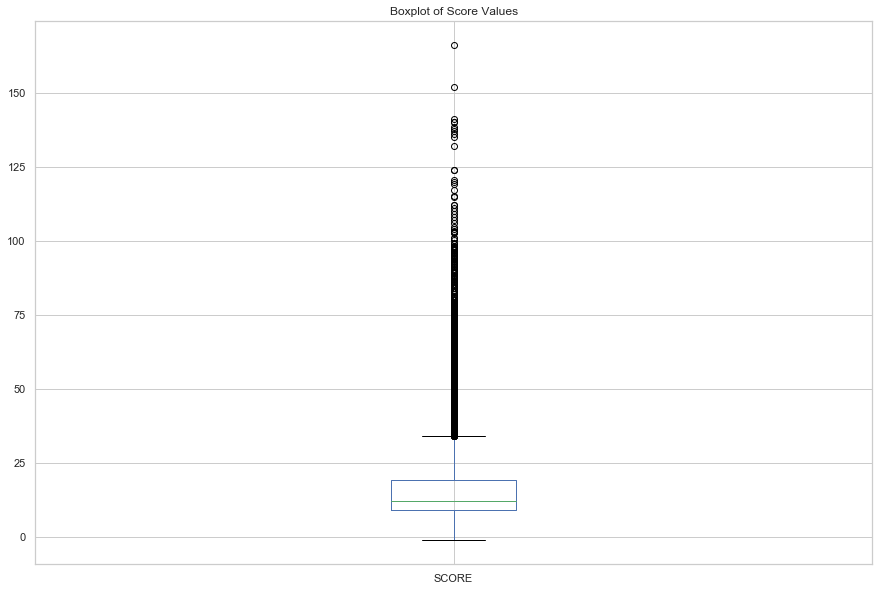

In [188]:
# visualize for outliers of scores
plt.figure(figsize=(15,10))
data.boxplot(column='SCORE')
plt.title('Boxplot of Score Values')

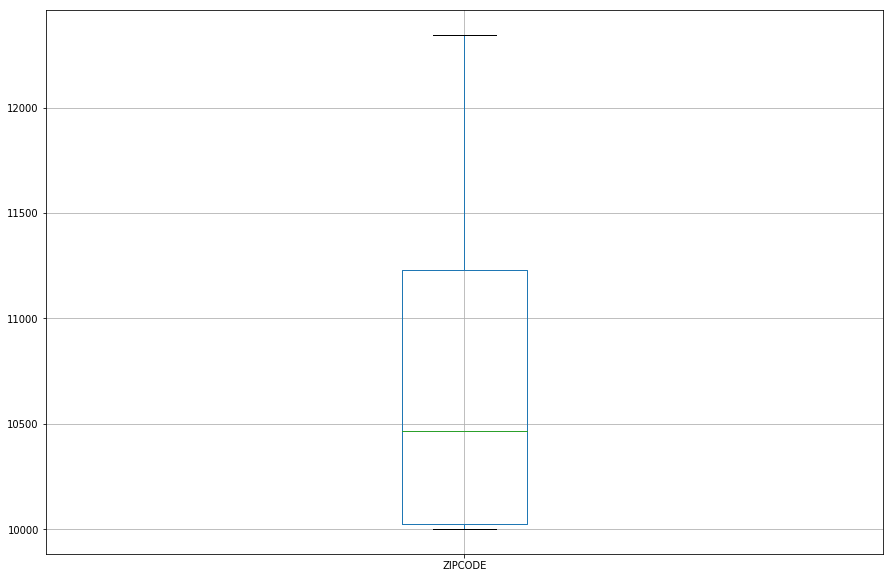

In [5]:
# visualize outliers of zipcodes
plt.figure(figsize=(15,10))
data.boxplot(column='ZIPCODE')

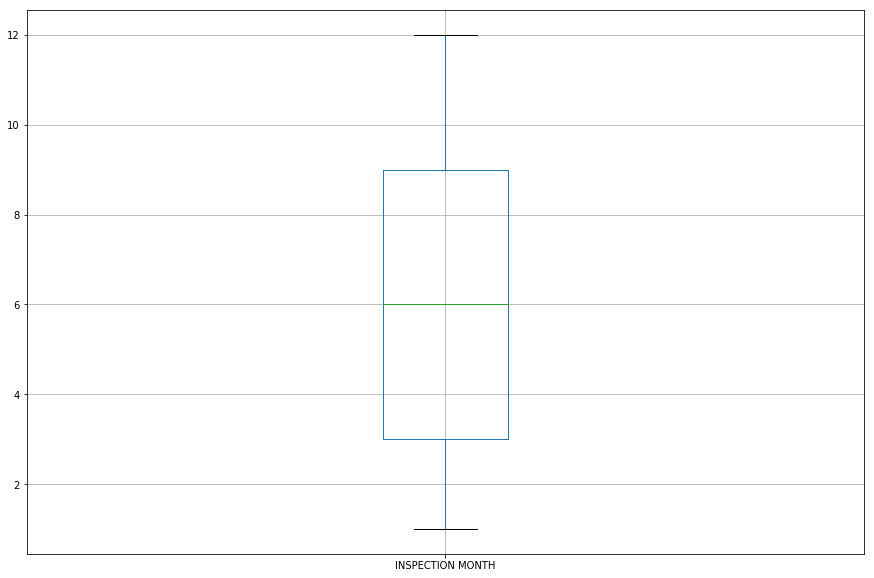

In [6]:
# visualize outliers of Inspection Month
plt.figure(figsize=(15,10))
data.boxplot(column='INSPECTION MONTH')

Text(0.5, 1.0, 'Boxplot of Inspection Year')

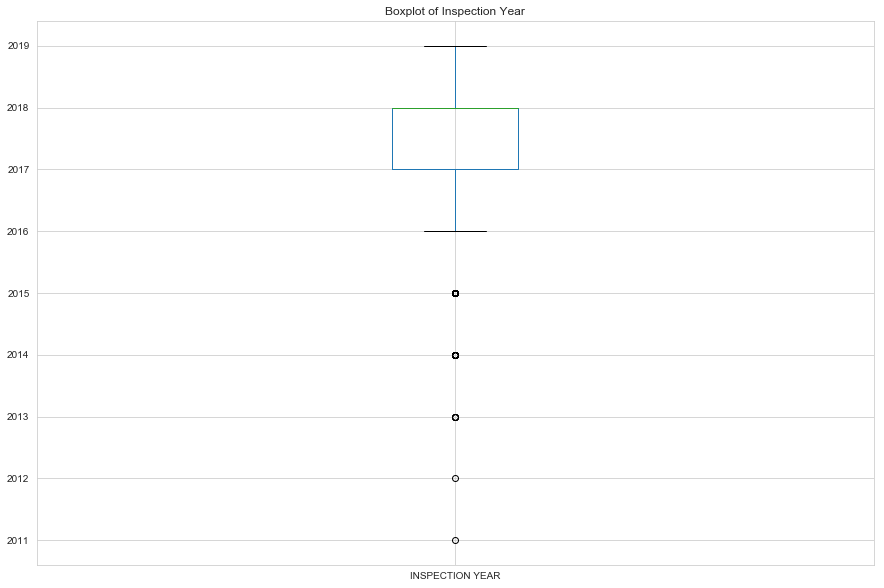

In [8]:
# visualize outliers of Inspection Year
plt.figure(figsize=(15,10))
data.boxplot(column='INSPECTION YEAR')
plt.title('Boxplot of Inspection Year')

In [5]:
# drop rows where inspections were completed before 2016
data = data[data['INSPECTION YEAR'] >= 2016]

In [22]:
data.shape

(114950, 105)

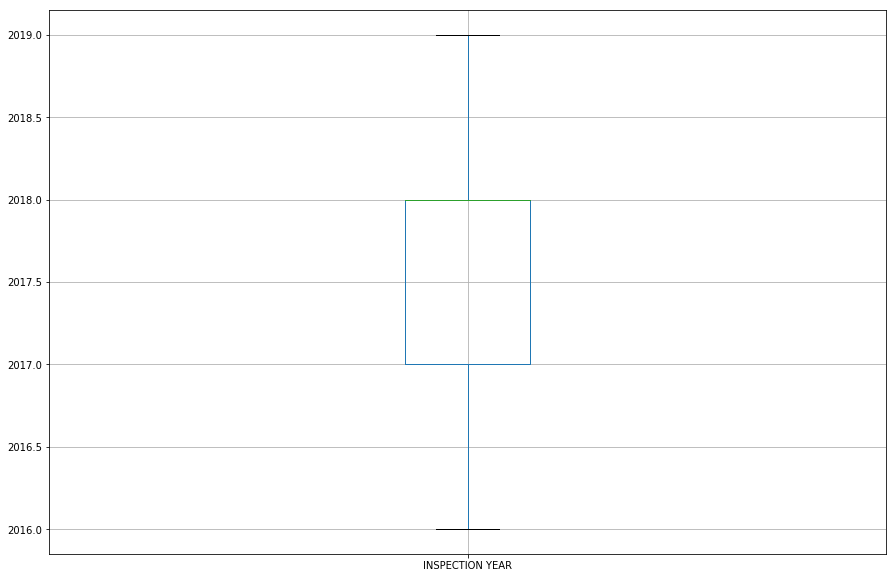

In [9]:
# visualize outliers of Inspection Year
plt.figure(figsize=(15,10))
data.boxplot(column='INSPECTION YEAR')

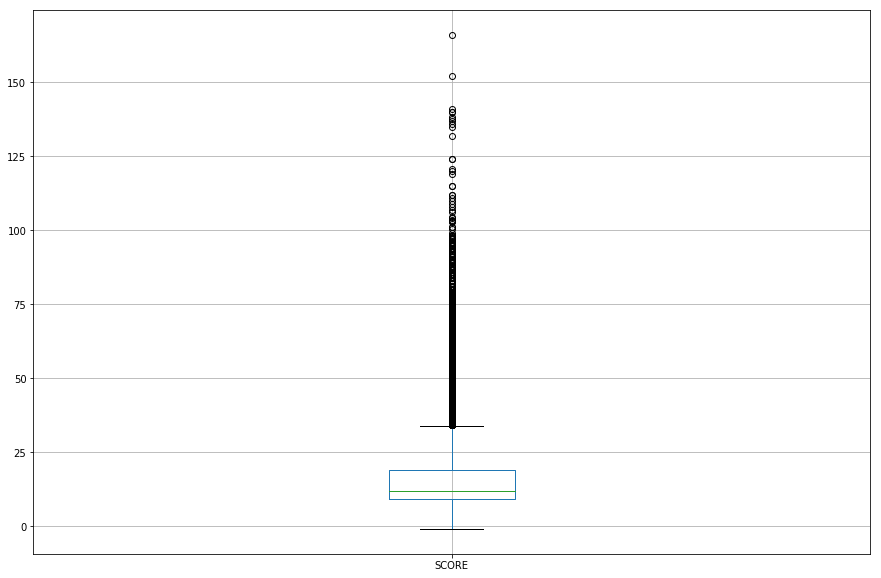

In [10]:
# visualize for outliers of scores again after dropping some rows
plt.figure(figsize=(15,10))
data.boxplot(column='SCORE')

In [6]:
# drop rows where score is greater than 28 pts (according to restaurant inspection evaluation information - if score is above 28, restaurant will get a C or may be closed)
data = data[data.SCORE < 28.0]

In [26]:
data.shape

(102657, 105)

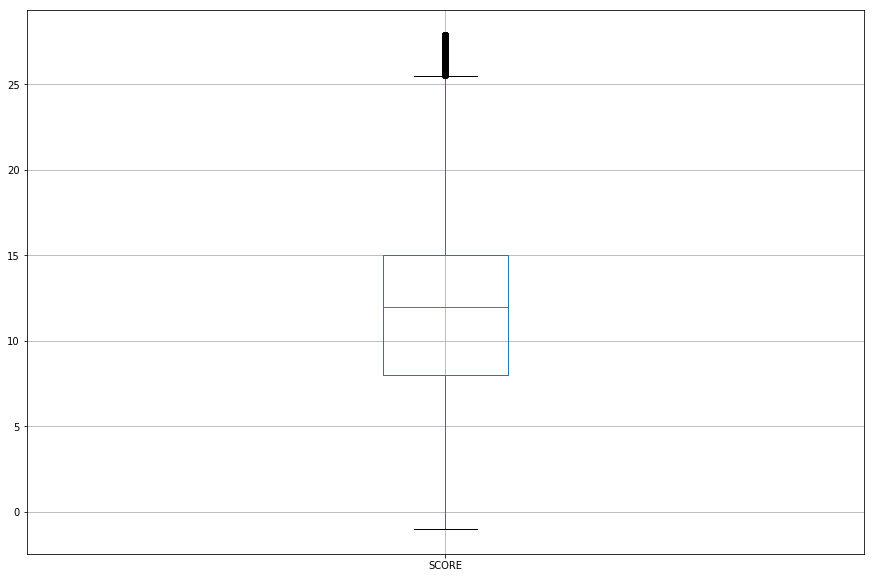

In [12]:
# visualize for outliers of scores again after dropping some rows
plt.figure(figsize=(15,10))
data.boxplot(column='SCORE')

In [13]:
# review value_counts of Grade column (1 = received an A, 0 = did not receive an A) to see if class distribution changed
data.GRADE.value_counts()

1    67906
0    34751
Name: GRADE, dtype: int64

In [29]:
# relook at general statistics to check for any changes
data.describe()

,Unnamed: 0,CAMIS,ZIPCODE,INSPECTION MONTH,INSPECTION YEAR,FLAG__Critical,FLAG__Not Critical,VIOLATION__02A,VIOLATION__02B,VIOLATION__02C,...,VIOLATION__20E,VIOLATION__20F,VIOLATION__22A,VIOLATION__22B,VIOLATION__22C,VIOLATION__22E,VIOLATION__None,VIOLATION__Other,SCORE,GRADE
count,102657.000000,1.026570e+05,102657.000000,102657.000000,102657.000000,102657.000000,102657.000000,102657.000000,102657.000000,102657.000000,...,102657.000000,102657.000000,102657.000000,102657.000000,102657.00000,102657.000000,102657.000000,102657.000000,102657.000000,102657.000000
mean,60315.758107,4.570666e+07,10672.520364,5.948148,2017.426664,1.477639,1.277663,0.001695,0.142445,0.003341,...,0.000789,0.012527,0.005796,0.000331,0.01206,0.000458,0.023661,0.019745,12.105636,0.661484
std,34695.872055,4.425593e+06,595.687793,3.403733,0.985547,1.019196,0.972460,0.041135,0.355066,0.057707,...,0.028079,0.114332,0.075911,0.018196,0.10942,0.021392,0.156352,0.151782,6.008747,0.473207
min,0.000000,3.007544e+07,10000.000000,1.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,30225.000000,4.134002e+07,10022.000000,3.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,8.000000,0.000000
50%,60511.000000,5.000075e+07,10467.000000,5.000000,2018.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,12.000000,1.000000
75%,90427.000000,5.004600e+07,11228.000000,9.000000,2018.000000,2.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,15.000000,1.000000
max,120763.000000,5.009212e+07,12345.000000,12.000000,2019.000000,12.000000,10.000000,1.000000,2.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.00000,1.000000,3.000000,5.000000,27.888889,1.000000


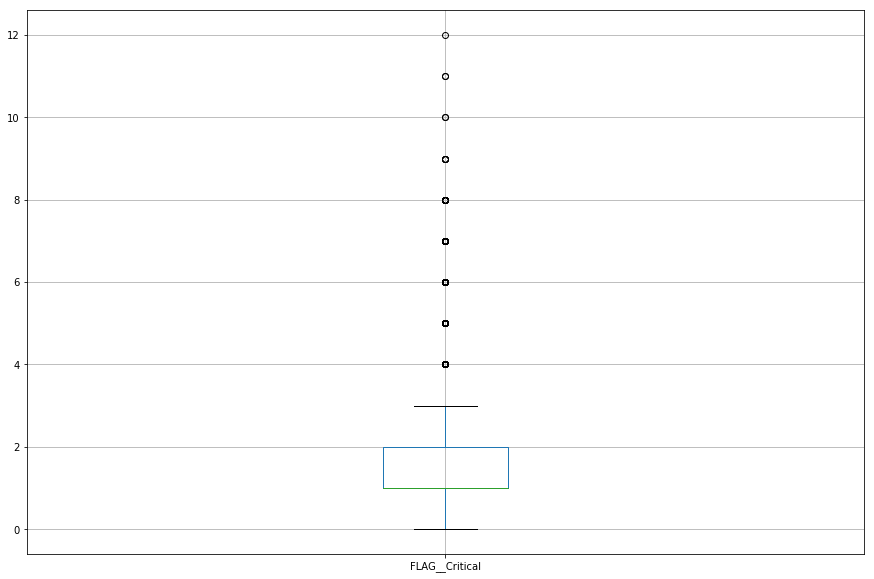

In [6]:
# visualize outliers of Critical Flags
plt.figure(figsize=(15,10))
data.boxplot(column='FLAG__Critical')

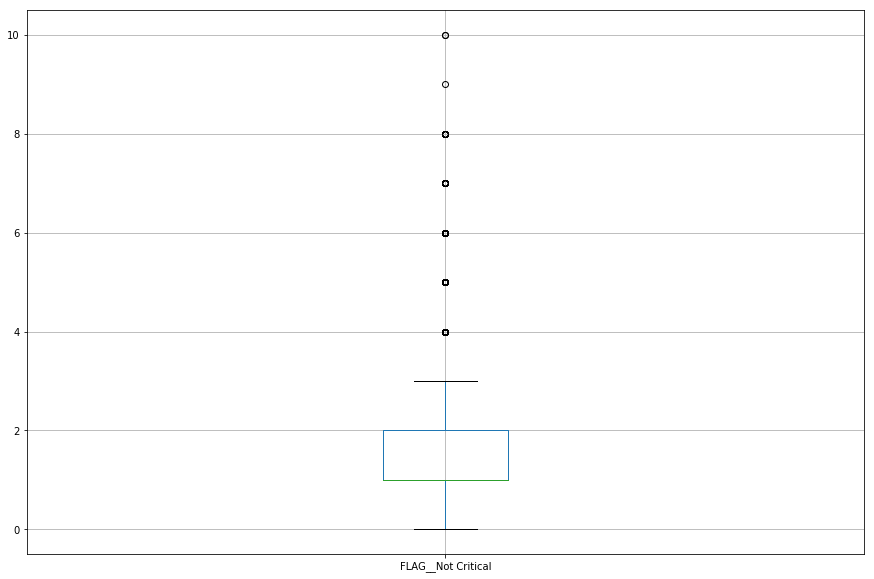

In [7]:
# visualize outliers of Critical Flags
plt.figure(figsize=(15,10))
data.boxplot(column='FLAG__Not Critical')

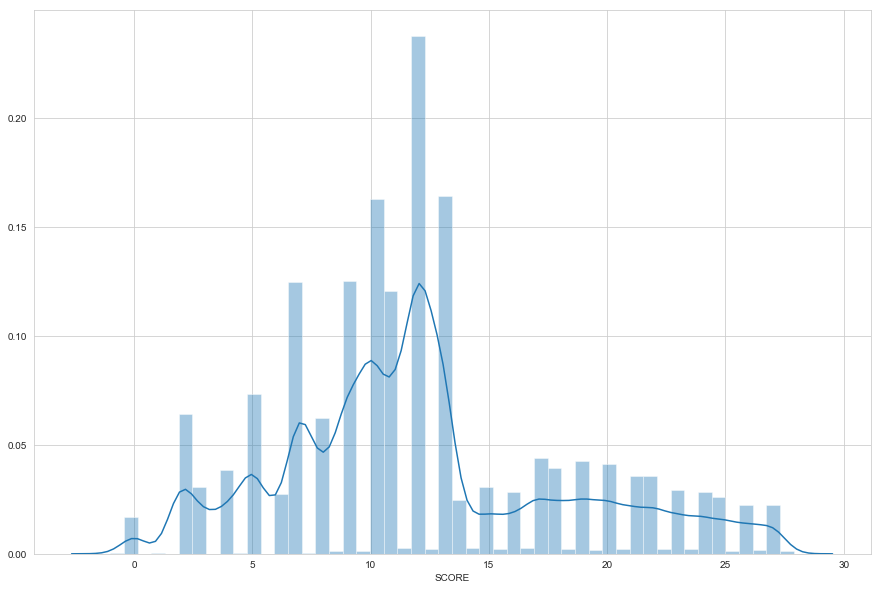

In [32]:
plt.figure(figsize=(15,10))
sns.distplot(data.SCORE)

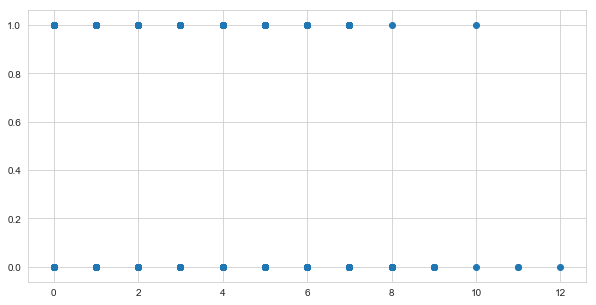

In [16]:
# visualize relationship between number of critical violations vs Grade
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.scatter(data['FLAG__Critical'], data['GRADE'])

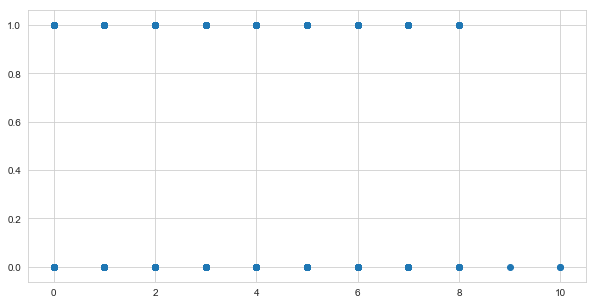

In [17]:
# visualize relationship between number of non-critical violations vs Grade
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.scatter(data['FLAG__Not Critical'], data['GRADE'])

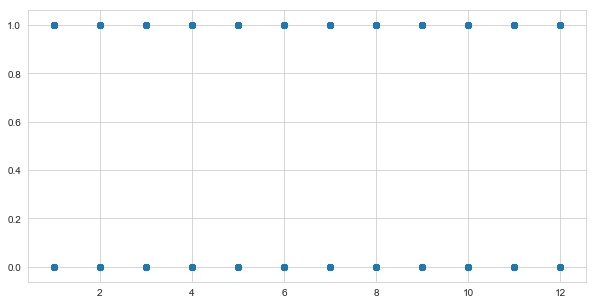

In [18]:
# visualize relationship between Inspection Month vs. Grade
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.scatter(data['INSPECTION MONTH'], data['GRADE'])

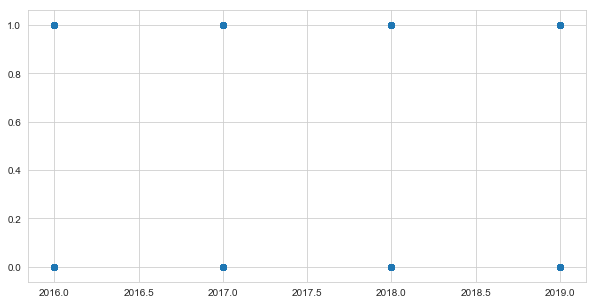

In [19]:
# visualize relationship between Inspection Year vs. Grade
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.scatter(data['INSPECTION YEAR'], data['GRADE'])

<Figure size 2160x1800 with 0 Axes>

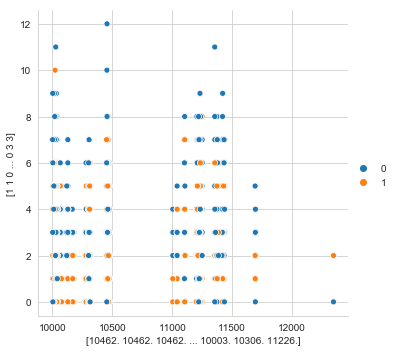

In [20]:
plt.figure(figsize=(30,25))
sns.relplot(x=data['ZIPCODE'].values, y=data['FLAG__Critical'].values, hue=data['GRADE'].values, data=data)

In [7]:
# change Zip Code dtype to integer
data.ZIPCODE = data.ZIPCODE.astype(int)

In [8]:
# create table for heatmap visualization (next step)
fz = data.pivot_table(index='ZIPCODE', columns='FLAG__Critical',values='GRADE') 

Text(0.5, 1.0, 'Heatmap of Restaurant Inspection Grade by Number of Critical Violations and Zip Code')

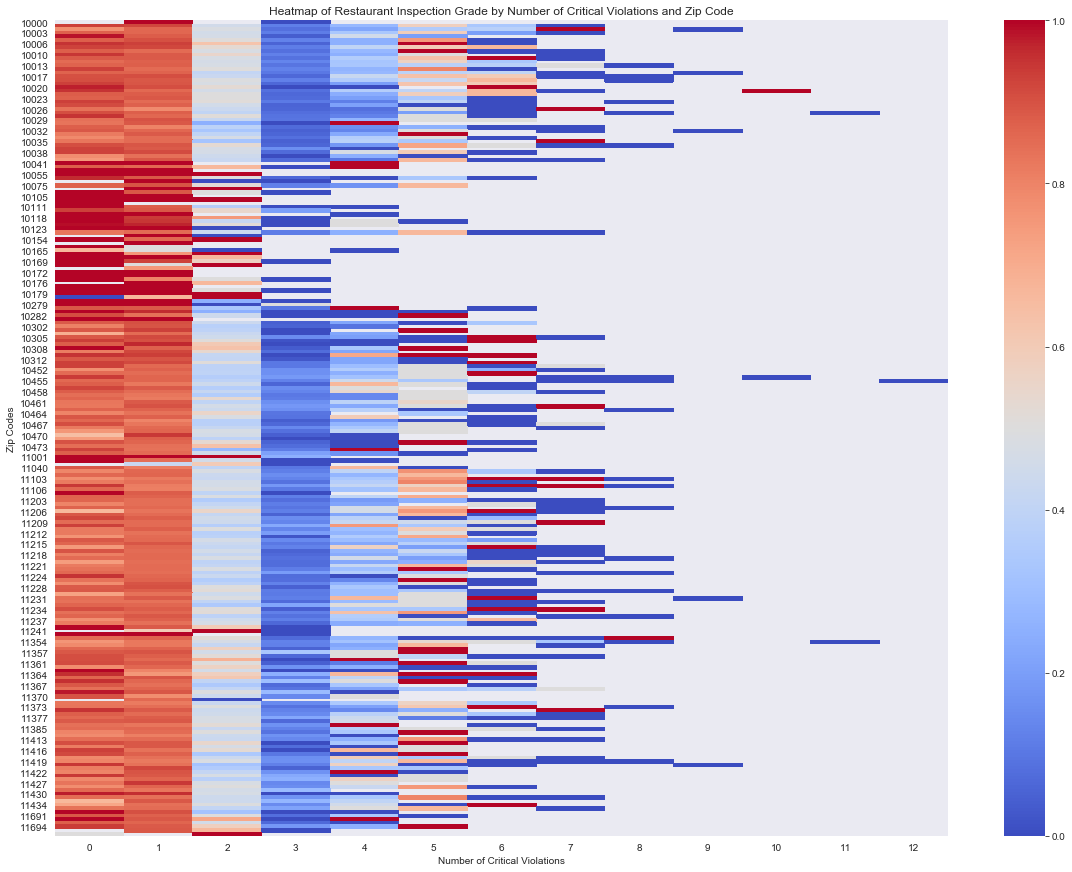

In [115]:
# visualizing the grade of each district to number of critical flags
plt.figure(figsize=(20,15))
sns.set_style("darkgrid")
# cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
fz_heat = sns.heatmap(fz, cmap='coolwarm')
fz_heat.set_ylabel('Zip Codes')
fz_heat.set_xlabel('Number of Critical Violations')
fz_heat.set_title('Heatmap of Restaurant Inspection Grade by Number of Critical Violations and Zip Code')

Statistical Summary of Score


Did Not Receive an A
         count       mean      std  min   25%   50%   75%        max
SCORE  34751.0  17.341082  6.21555 -1.0  13.0  18.0  22.0  27.888889
--------------------------------------------------------------------------------
Received an A
         count      mean       std  min  25%   50%   75%        max
SCORE  67906.0  9.426389  3.688649  0.0  7.0  10.0  12.0  27.888889


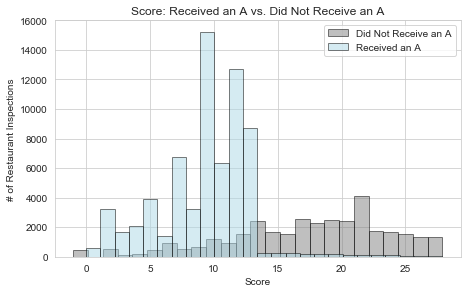

In [23]:
# Statistical summary of continuous variables 
print('Statistical Summary of Score')
print('\n')
print('Did Not Receive an A')
print(data[data['GRADE']==0][['SCORE']].describe().transpose())
print('--'*40)
print('Received an A')
print(data[data['GRADE']==1][['SCORE']].describe().transpose())

# Subplots of Numeric Features
sns.set_style('whitegrid')
fig = plt.figure(figsize = (16,10))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(221)
ax1.hist(data[data['GRADE']==0].SCORE, bins = 25, label ='Did Not Receive an A', alpha = .50,edgecolor= 'black',color ='grey')
ax1.hist(data[data['GRADE']==1].SCORE, bins = 25, label = 'Received an A', alpha = .50, edgecolor = 'black',color = 'lightblue')
ax1.set_title('Score: Received an A vs. Did Not Receive an A')
ax1.set_xlabel('Score')
ax1.set_ylabel('# of Restaurant Inspections')
ax1.legend(loc = 'upper right')

In [9]:
# creat subset of data to make visualization of frequency of restaurant inspections per zip code
zip_count = data.loc[:, ['ZIPCODE', 'GRADE']]

In [25]:
zip_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102657 entries, 0 to 120763
Data columns (total 2 columns):
ZIPCODE    102657 non-null float64
GRADE      102657 non-null int64
dtypes: float64(1), int64(1)
memory usage: 2.3 MB


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

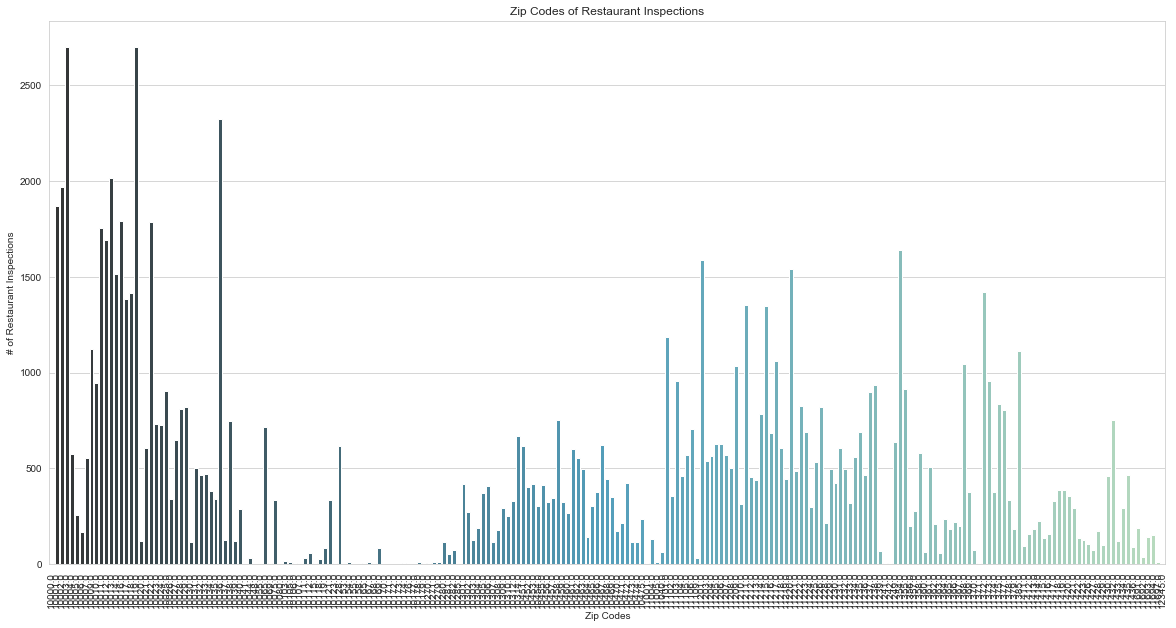

In [26]:
# Plot of Frequency of Zip Codes
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))

ax = sns.countplot(x = zip_count['ZIPCODE'], data = zip_count, palette = 'GnBu_d')
ax.set_xlabel('Zip Codes')
ax.set_ylabel('# of Restaurant Inspections')
ax.set_title('Zip Codes of Restaurant Inspections')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

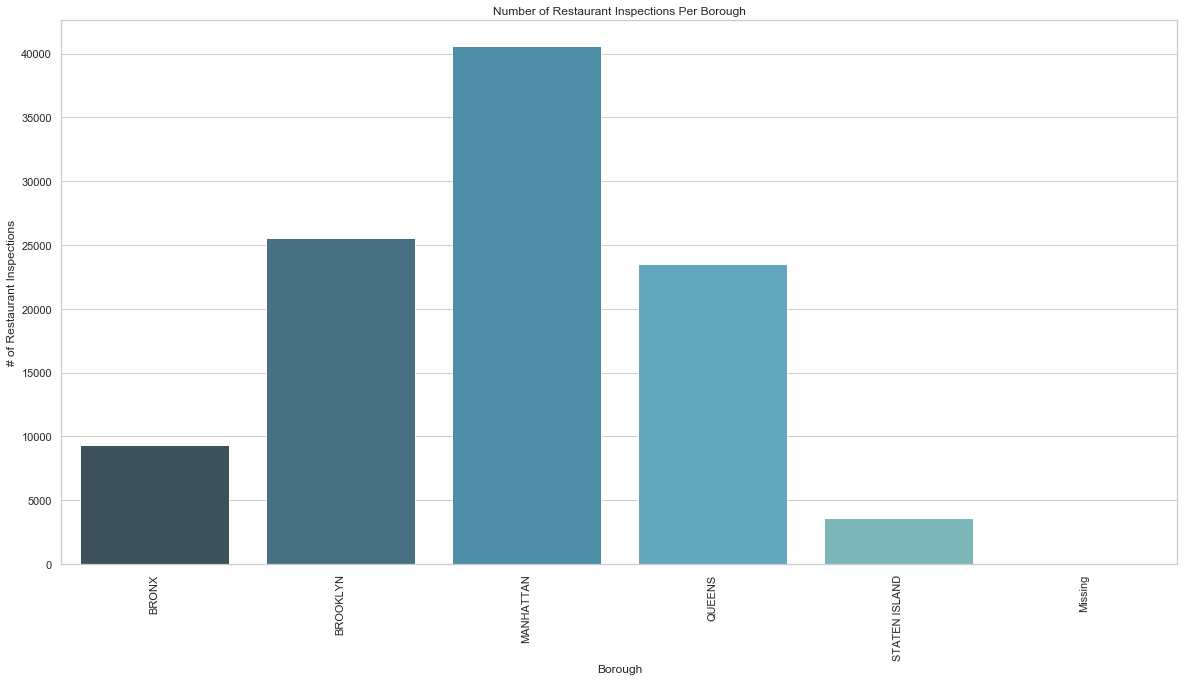

In [132]:
# Plot of Frequency of Zip Codes
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))

ax = sns.countplot(x = data['BORO']b, data = data, palette = 'GnBu_d')
ax.set_xlabel('Borough')
ax.set_ylabel('# of Restaurant Inspections')
ax.set_title('Number of Restaurant Inspections Per Borough')
plt.xticks(rotation=90)

In [93]:
data.columns

Index(['CAMIS', 'DBA', 'BORO', 'ZIPCODE', 'INSPECTION MONTH',
       'INSPECTION YEAR', 'FLAG__Critical', 'FLAG__Not Critical',
       'VIOLATION__02A', 'VIOLATION__02B',
       ...
       'VIOLATION__20F', 'VIOLATION__22A', 'VIOLATION__22B', 'VIOLATION__22C',
       'VIOLATION__22E', 'VIOLATION__None', 'VIOLATION__Other', 'SCORE',
       'GRADE', 'CUISINES'],
      dtype='object', length=104)

(array([ 9500., 10000., 10500., 11000., 11500., 12000., 12500.]),
 <a list of 7 Text xticklabel objects>)

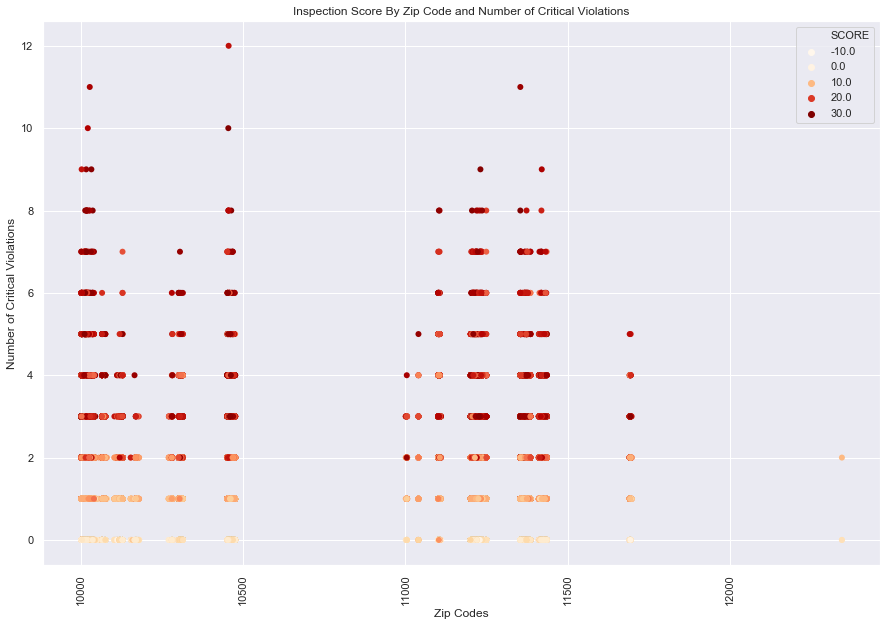

In [107]:
# Plot of Number of Critical Flags vs. Grade
sns.set(style="darkgrid")
plt.figure(figsize=(15,10))

score_ranking = data['SCORE'].sort_values()

ax = sns.scatterplot(x="ZIPCODE", y="FLAG__Critical",
                hue="SCORE",
                palette="OrRd",
                hue_order=score_ranking,
                sizes=(1, 8), linewidth=0,
                data=data)
ax.set_xlabel('Zip Codes')
ax.set_ylabel('Number of Critical Violations')
ax.set_title('Inspection Score By Zip Code and Number of Critical Violations')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83]),
 <a list of 84 Text xticklabel objects>)

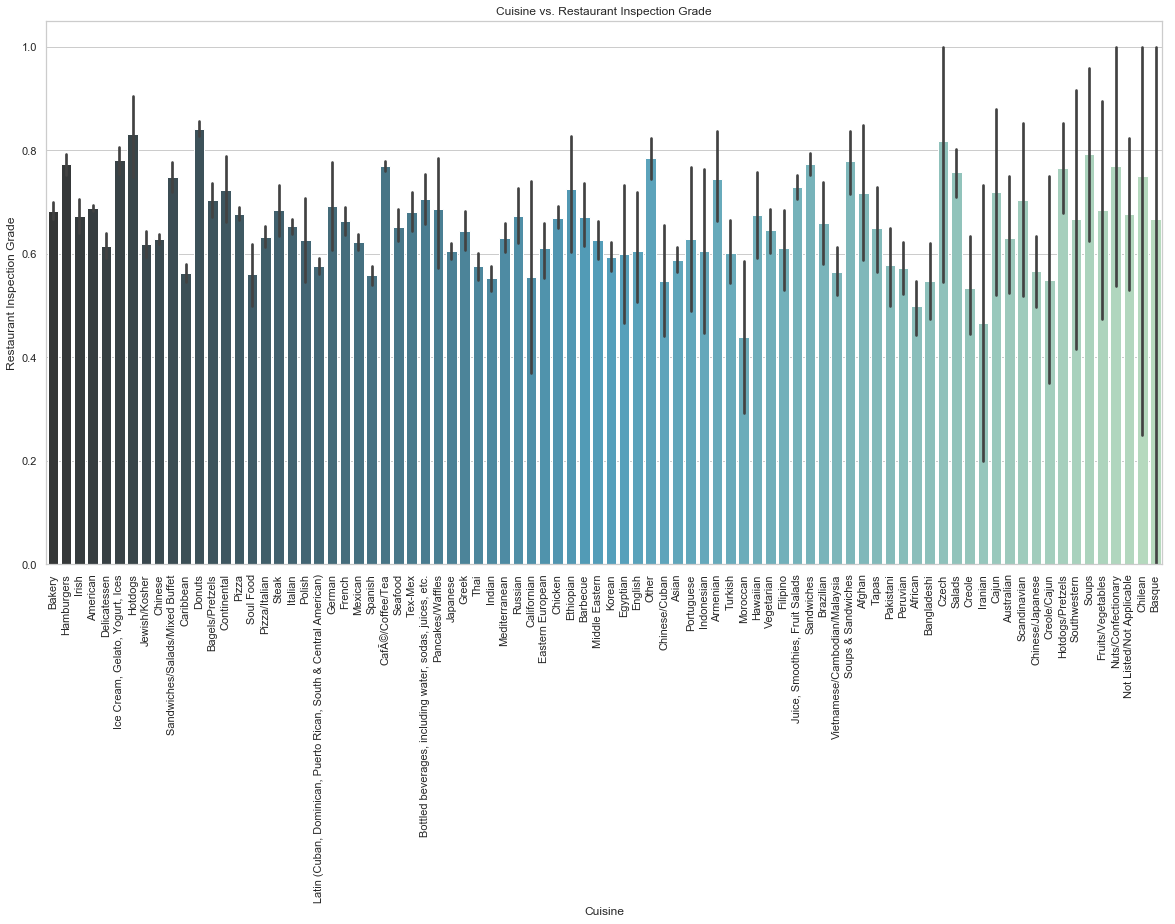

In [158]:
# Plot of Number of Critical Flags vs. Grade
sns.set(style="whitegrid")
plt.figure(figsize=(20,10))

ax = sns.barplot(x='CUISINE DESCRIPTION', y='GRADE', data=data, palette="GnBu_d")
ax.set_xlabel('Cuisine')
ax.set_ylabel('Restaurant Inspection Grade')
ax.set_title('Cuisine vs. Restaurant Inspection Grade')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83]),
 <a list of 84 Text xticklabel objects>)

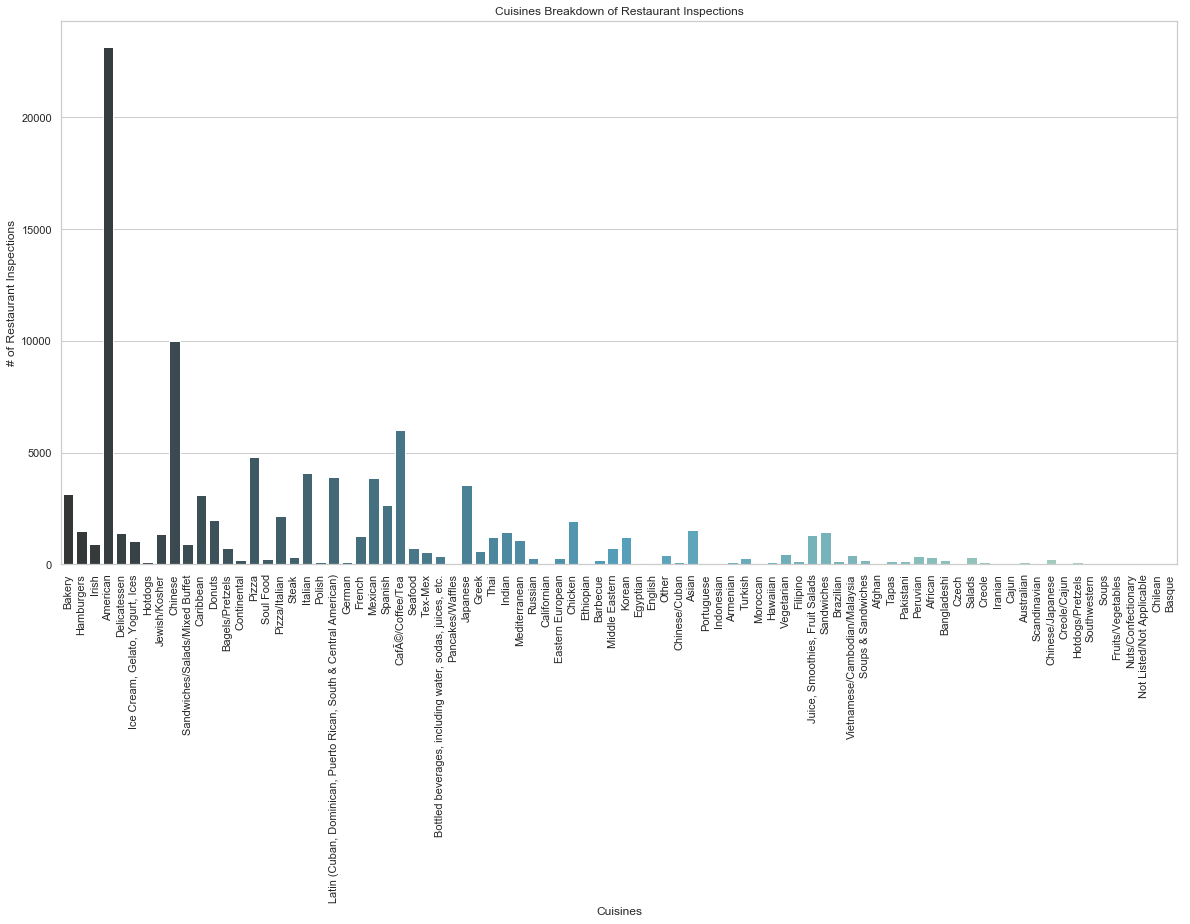

In [29]:
# Plot of Frequency of Cuisines in Restaurant Inspections
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))

ax = sns.countplot(x = 'CUISINE DESCRIPTION', data = data, palette = 'GnBu_d')
ax.set_xlabel('Cuisines')
ax.set_ylabel('# of Restaurant Inspec, palette="GnBu_d"tions')
ax.set_title('Cuisines Breakdown of Restaurant Inspections')
plt.xticks(rotation=90)

In [10]:
# create table for heatmap visualization (next step)
dt_grade = data.pivot_table(index='INSPECTION MONTH', columns='INSPECTION YEAR',values='GRADE') 

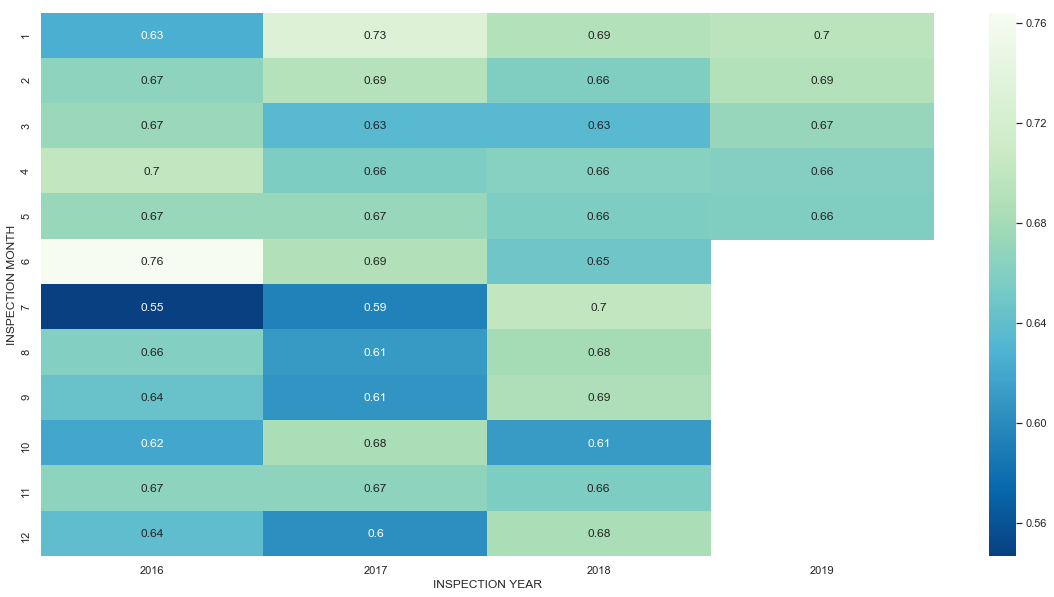

In [35]:
# visualizing the relationship between when restaurant inspection was conducted and grade
plt.figure(figsize=(20,10))
sns.heatmap(dt_grade, annot=True, cmap='GnBu_r')

# Feature Engineering & Selection

In [ ]:
# # categorize dummy variables into groups based on the number each code begins with
# data['VIOLATION_02'] = data.loc[:, 'VIOLATION__02A':'VIOLATION__02J'].sum(axis=1)
# data['VIOLATION_03'] = data.loc[:, 'VIOLATION__03A':'VIOLATION__03G'].sum(axis=1)
# data['VIOLATION_04'] = data.loc[:, 'VIOLATION__04A':'VIOLATION__04O'].sum(axis=1)
# data['VIOLATION_05'] = data.loc[:, 'VIOLATION__05A':'VIOLATION__05H'].sum(axis=1)
# data['VIOLATION_06'] = data.loc[:, 'VIOLATION__06A':'VIOLATION__06I'].sum(axis=1)
# data['VIOLATION_08'] = data.loc[:, 'VIOLATION__08A':'VIOLATION__08C'].sum(axis=1)
# data['VIOLATION_09'] = data.loc[:, 'VIOLATION__09A':'VIOLATION__09C'].sum(axis=1)
# data['VIOLATION_10'] = data.loc[:, 'VIOLATION__10A':'VIOLATION__10J'].sum(axis=1)
# data['VIOLATION_15'] = data.loc[:, 'VIOLATION__15I':'VIOLATION__15T'].sum(axis=1)
# data['VIOLATION_16'] = data.loc[:, 'VIOLATION__16A':'VIOLATION__16F'].sum(axis=1)
# data['VIOLATION_18'] = data.loc[:, 'VIOLATION__18B':'VIOLATION__18G'].sum(axis=1)
# data['VIOLATION_20'] = data.loc[:, 'VIOLATION__20A':'VIOLATION__20F'].sum(axis=1)
# data['VIOLATION_22'] = data.loc[:, 'VIOLATION__22A':'VIOLATION__22E'].sum(axis=1)

In [ ]:
# # drop dummy variable columns
# data_sub = data.drop(['Unnamed: 0', 'VIOLATION__02A', 'VIOLATION__02B', 'VIOLATION__02C', 'VIOLATION__02D', 'VIOLATION__02E', 'VIOLATION__02F', 'VIOLATION__02G',
#  'VIOLATION__02H', 'VIOLATION__02I', 'VIOLATION__02J', 'VIOLATION__03A', 'VIOLATION__03B', 'VIOLATION__03C', 'VIOLATION__03D',
#  'VIOLATION__03E', 'VIOLATION__03F', 'VIOLATION__03G', 'VIOLATION__04A', 'VIOLATION__04B', 'VIOLATION__04C', 'VIOLATION__04D',
#  'VIOLATION__04E', 'VIOLATION__04F', 'VIOLATION__04G', 'VIOLATION__04H', 'VIOLATION__04I', 'VIOLATION__04J', 'VIOLATION__04K',
#  'VIOLATION__04L', 'VIOLATION__04M', 'VIOLATION__04N', 'VIOLATION__04O', 'VIOLATION__05A', 'VIOLATION__05B', 'VIOLATION__05C',
#  'VIOLATION__05D', 'VIOLATION__05E', 'VIOLATION__05F', 'VIOLATION__05H', 'VIOLATION__06A', 'VIOLATION__06B', 'VIOLATION__06C',
#  'VIOLATION__06D', 'VIOLATION__06E', 'VIOLATION__06F', 'VIOLATION__06G', 'VIOLATION__06H', 'VIOLATION__06I',
#  'VIOLATION__08A', 'VIOLATION__08B', 'VIOLATION__08C', 'VIOLATION__09A', 'VIOLATION__09B', 'VIOLATION__09C', 'VIOLATION__10A',
#  'VIOLATION__10B', 'VIOLATION__10C', 'VIOLATION__10D', 'VIOLATION__10E', 'VIOLATION__10F', 'VIOLATION__10G', 'VIOLATION__10H',
#  'VIOLATION__10I', 'VIOLATION__10J', 'VIOLATION__15I', 'VIOLATION__15J', 'VIOLATION__15K', 'VIOLATION__15L', 'VIOLATION__15S', 'VIOLATION__15T', 'VIOLATION__16A', 'VIOLATION__16B',
#  'VIOLATION__16C', 'VIOLATION__16D', 'VIOLATION__16E', 'VIOLATION__16F', 'VIOLATION__18B', 'VIOLATION__18C',
#  'VIOLATION__18D', 'VIOLATION__18F', 'VIOLATION__18G', 'VIOLATION__20A',
#  'VIOLATION__20B', 'VIOLATION__20D', 'VIOLATION__20E', 'VIOLATION__20F', 'VIOLATION__22A', 'VIOLATION__22B', 'VIOLATION__22C', 
# 'VIOLATION__22E'], axis=1).copy()

In [11]:
# grouping cuisines in different groups to convert to numeric
african = ['Egyptian', 'Moroccan', 'Ethiopian', 'African']
american = ['Hotdogs/Pretzels', 'Seafood', 'Tex-Mex', 'Hamburgers', 'American', 'Hotdogs', 'Steak', 'Californian', 'Chicken', 'Barbecue', 'Hawaiian', 'Cajun', 'Creole', 'Soul Food', 'Creole/Cajun', 'Creole/Cajun', 'Southwestern']
asia_pacific = ['Indonesian', 'Filipino']
asian = ['Asian', 'Chinese', 'Japanese', 'Thai', 'Indian', 'Korean', 'Vietnamese/Cambodian/Malaysia','Chinese/Japanese', 'Bangladeshi', 'Pakistani']
australian = 'Australian'
european = ['Basque', 'Scandinavian', 'Tapas', 'Irish', 'Continental', 'Pizza', 'Pizza/Italian', 'Italian', 'Polish', 'German', 'French', 'Spanish', 'Greek', 'Mediterranean', 'Eastern European', 'English', 'Portuguese', 'Tapas']
kosher = 'Jewish/Kosher'
latin = ['Latin (Cuban, Dominican, Puerto Rican, South & Central American)', 'Caribbean', 'Brazilian', 'Mexican', 'Chinese/Cuban', 'Peruvian', 'Chilean']
middle_eastern = ['Middle Eastern', 'Afghan', 'Armenian', 'Turkish', 'Iranian']
russian = ['Russian', 'Czech']
bakeries = ['Bagels/Pretzels', 'Donuts', 'CafÃ©/Coffee/Tea', 'Bakery']
delis = ['Delicatessen', 'Sandwiches/Salads/Mixed Buffet', 'Pancakes/Waffles', 'Soups & Sandwiches', 'Sandwiches', 'Soups']
beverages = ['Juice, Smoothies, Fruit Salads', 'Bottled beverages, including water, sodas, juices, etc.']
healthy = ['Vegetarian', 'Salads', 'Fruits/Vegetables', 'Nuts/Confectionary']
cold_desserts = 'Ice Cream, Gelato, Yogurt, Ices'
other = 'Other'
unknown = 'Not Listed/Not Applicable'

In [12]:
# define a function to convert string value in CUISINE DESCRIPTION to numeric for categorical variable
def categorize_cuisine(x):
    if x in african:
        return 'African'
    elif x in american:
        return 'American'
    elif x in asia_pacific:
        return 'Asia Pacific'
    elif x in asian:
        return 'Asian'
    elif x == australian:
        return 'Australian'
    elif x in european:
        return 'European'
    elif x in kosher:
        return 'Kosher'
    elif x in latin:
        return 'Latin'
    elif x in middle_eastern:
        return 'Middle_Eastern'
    elif x in russian:
        return 'Russian'
    elif x in bakeries:
        return 'Bakeries'
    elif x in delis:
        return 'Delis'
    elif x in beverages:
        return 'Beverages'
    elif x in healthy:
        return 'Healthy'
    elif x in cold_desserts:
        return 'Cold Desserts'
    elif x in other:
        return 'Other'
    else:
        return 'Unknown'

In [13]:
# create new column and convert cuisine to a number
data['CUISINES'] = data['CUISINE DESCRIPTION'].apply(categorize_cuisine)

In [14]:
# drop Cuisine Description column since we have the new Cuisines column
data = data.drop(['CUISINE DESCRIPTION', 'Unnamed: 0'], axis=1)

In [23]:
data.head()

,CAMIS,DBA,BORO,ZIPCODE,INSPECTION MONTH,INSPECTION YEAR,FLAG__Critical,FLAG__Not Critical,VIOLATION__02A,VIOLATION__02B,...,VIOLATION__20F,VIOLATION__22A,VIOLATION__22B,VIOLATION__22C,VIOLATION__22E,VIOLATION__None,VIOLATION__Other,SCORE,GRADE,CUISINES
0,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,2,2016,1,1,0,0,...,0,0,0,0,0,0,0,10.0,1,Bakeries
1,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,5,2017,1,1,0,0,...,0,0,0,0,0,0,0,7.0,1,Bakeries
2,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,5,2018,0,2,0,0,...,0,0,0,0,0,0,0,5.0,1,Bakeries
3,30112340,WENDY'S,BROOKLYN,11225.0,3,2018,1,2,0,0,...,0,0,0,0,0,0,0,12.0,1,American
4,30112340,WENDY'S,BROOKLYN,11225.0,3,2019,1,2,0,0,...,0,0,0,0,0,0,0,13.0,1,American


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

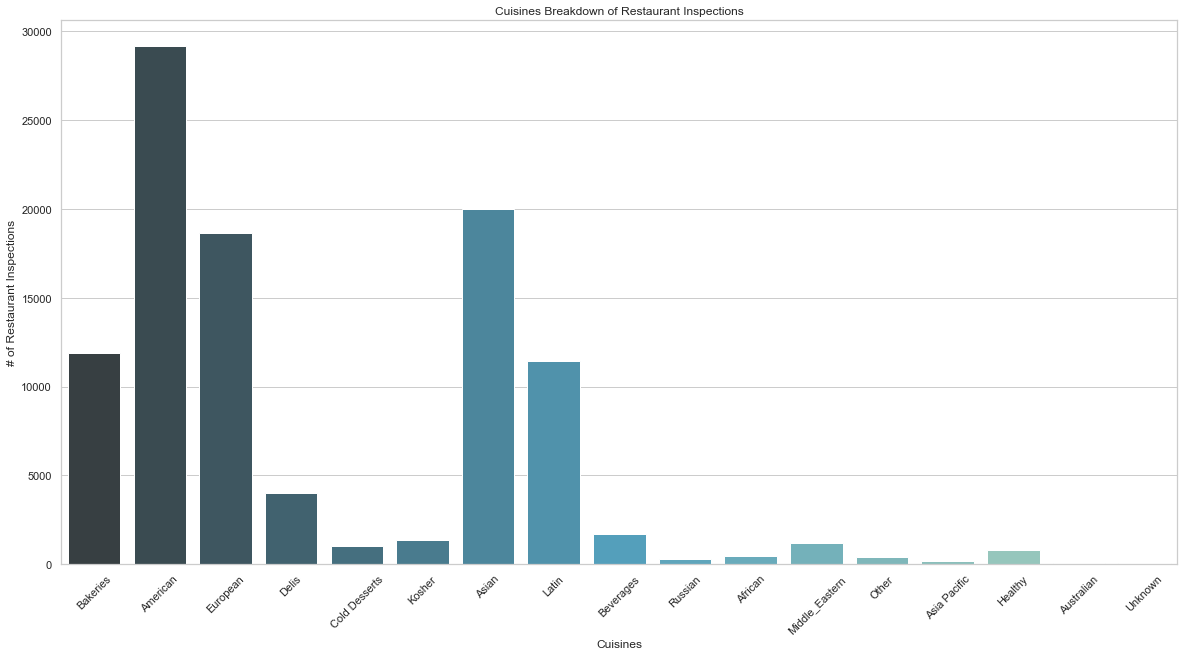

In [41]:
# Plot of Frequency of Cuisines in Restaurant Inspections After Categorization
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))

ax = sns.countplot(x = 'CUISINES', data = data, palette = 'GnBu_d')
ax.set_xlabel('Cuisines')
ax.set_ylabel('# of Restaurant Inspections')
ax.set_title('Cuisines Breakdown of Restaurant Inspections')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

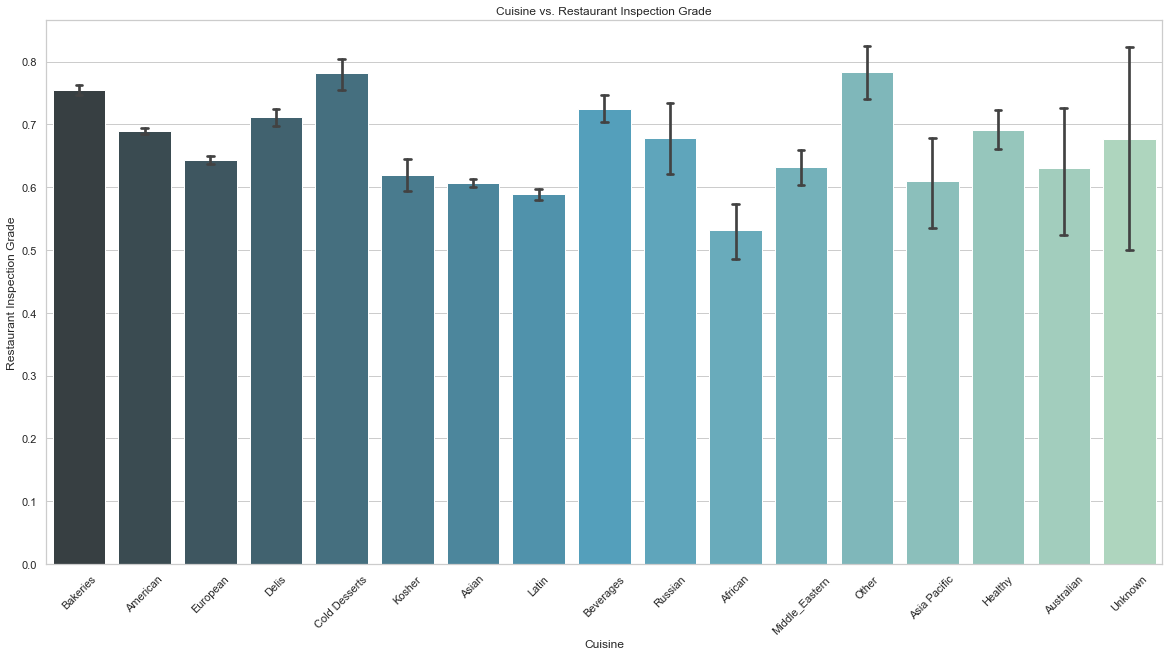

In [42]:
# Plot of Number of Cuisine vs. Grade
sns.set(style="whitegrid")
plt.figure(figsize=(20,10))

ax = sns.barplot(x='CUISINES', y='GRADE', data=data, capsize=.1, palette="GnBu_d")
ax.set_xlabel('Cuisine')
ax.set_ylabel('Restaurant Inspection Grade')
ax.set_title('Cuisine vs. Restaurant Inspection Grade')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

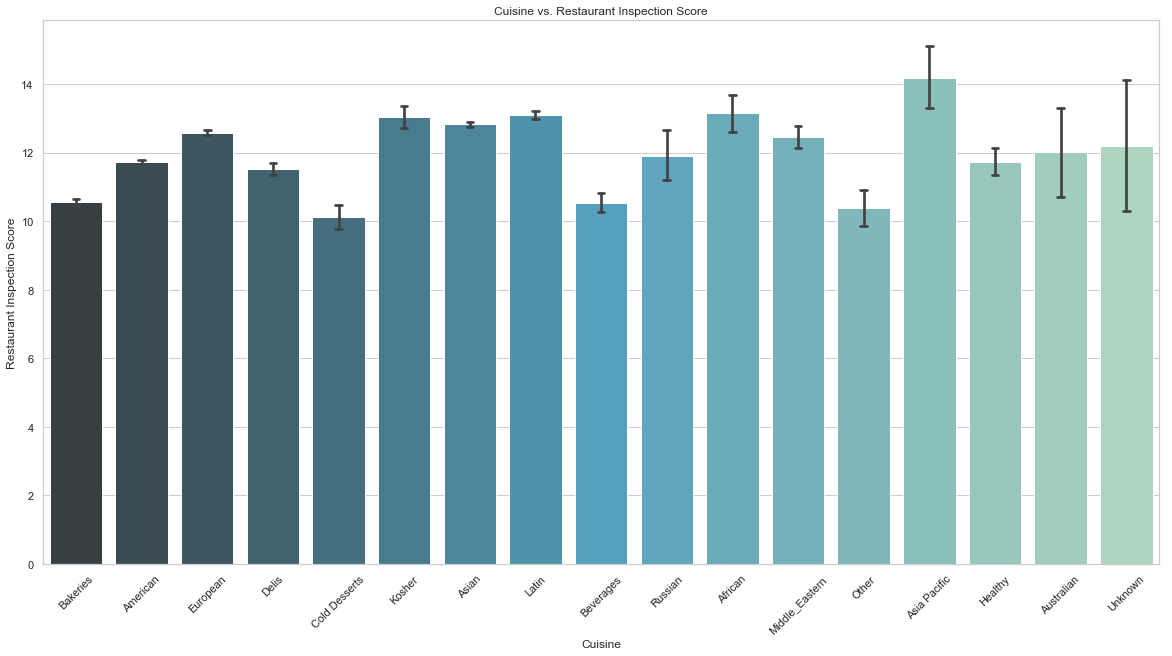

In [43]:
# Plot of Number of Cuisine vs. Score
sns.set(style="whitegrid")
plt.figure(figsize=(20,10))

ax = sns.barplot(x='CUISINES', y='SCORE', data=data, capsize=.1, palette="GnBu_d")
ax.set_xlabel('Cuisine')
ax.set_ylabel('Restaurant Inspection Score')
ax.set_title('Cuisine vs. Restaurant Inspection Score')
plt.xticks(rotation=45)

In [15]:
# create dummy variables of BORO column
boro_dummies = pd.get_dummies(data['BORO'])

In [16]:
# concat the boro_dummies dataframe into the main dataframe
data_boro = pd.concat([data, boro_dummies], axis=1)

In [17]:
# create dummy variables of ZIPCODE column
zipcode_dummies = pd.get_dummies(data_boro['ZIPCODE'], prefix='ZIP')

In [18]:
# concat the zipcode_dummies dataframe into main dataframe
data_zip = pd.concat([data_boro, zipcode_dummies], axis=1)

In [19]:
# create dummy variables of INSPECTION MONTH column
month_dummies = pd.get_dummies(data_zip['INSPECTION MONTH'], prefix='MONTH')

In [20]:
# concat the month_dummies dataframe into main dataframe
data_month = pd.concat([data_zip, month_dummies], axis=1)

In [21]:
# create dummy variables of INSPECTION YEAR column
year_dummies = pd.get_dummies(data_month['INSPECTION YEAR'], prefix='YEAR')

In [22]:
# concat the year_dummies dataframe into main dataframe
data_year = pd.concat([data_month, year_dummies], axis=1)

In [23]:
# create dummy variables of CUISINES column
cuisine_dummies = pd.get_dummies(data_month['CUISINES'])

In [24]:
# concat the year_dummies dataframe into main dataframe
data_cuisine = pd.concat([data_year, cuisine_dummies], axis=1)

In [25]:
# separate dataframe into a smaller dataframe with features for models
features = data_cuisine.loc[:, 'FLAG__Critical':'Russian'].drop(['CUISINES'], axis=1)

In [35]:
features.head()

,FLAG__Critical,FLAG__Not Critical,VIOLATION__02A,VIOLATION__02B,VIOLATION__02C,VIOLATION__02D,VIOLATION__02E,VIOLATION__02F,VIOLATION__02G,VIOLATION__02H,...,Beverages,Cold Desserts,Delis,European,Healthy,Kosher,Latin,Middle_Eastern,Other,Russian
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Model

### Import Libraries

In [26]:
# import libraries
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, f1_score, classification_report, confusion_matrix, accuracy_score
import pickle

In [27]:
# define function to pick model after it is fit
def pickle_model(model_name, model):
    model_pickle_path = 'EDA_{}.pkl'.format(model_name)
    model_pickle = open(model_pickle_path, 'wb')
    pickle.dump(model, model_pickle)
    model_pickle.close()

### Train Test Split

In [42]:
# identify X and y
X = features.drop(['GRADE', 'VIOLATION__Other', 'YEAR_2019', 'MONTH_12'], axis=1)
y = features.GRADE

In [43]:
# create training and testing datasets with 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Fixing Class Imbalance

In [44]:
# Concat X_train, y_train together into a training dataset
data_train = pd.concat([X_train, y_train], axis=1)

In [45]:
# Separate minority and majority classes
No_A = data_train[data_train.GRADE==0]
Yes_A = data_train[data_train.GRADE==1]

In [46]:
len(data_train)

82125

In [47]:
print('# of Restaurant Inspections that Did Not Receive An A: '+ str(len(No_A)))
print('# of Restaurant Inspections that Received an A: '+ str(len(Yes_A)))

# of Restaurant Inspections that Did Not Receive An A: 27793
# of Restaurant Inspections that Received an A: 54332


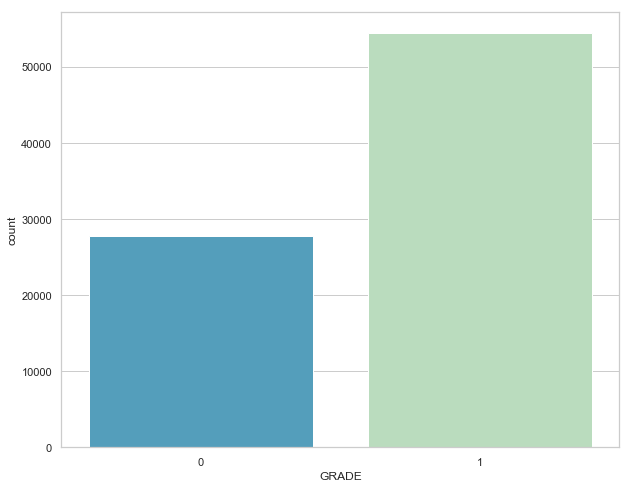

In [64]:
# visualize class balance
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
sns.countplot(x='GRADE',data=data_train, palette='GnBu_r')

In [48]:
# Undersample majority
NoA_downsampled = resample(Yes_A,
                                replace = False, # sample without replacement
                                n_samples = len(No_A), # match minority n
                                random_state = 23) # reproducible results

In [49]:
len(NoA_downsampled)

27793

In [50]:
len(No_A)

27793

In [51]:
# combine minority and downsampled majority
downsampled = pd.concat([No_A, NoA_downsampled])

In [52]:
# check counts
downsampled.GRADE.value_counts()

1    27793
0    27793
Name: GRADE, dtype: int64

### Scaling the Data

In [53]:
# concat testing data together
testing = pd.concat([X_test, y_test], axis=1)

In [56]:
# instantiate the scaler and fit to train data
scaler = StandardScaler()
scaled_train = scaler.fit_transform(downsampled)

In [57]:
#Use the .transform() method to transform the features to a scaled version.
scaled_test = scaler.transform(testing)
data_feat = pd.DataFrame(scaled_train, columns=downsampled.columns)
data_feat.head()

,FLAG__Critical,FLAG__Not Critical,VIOLATION__02A,VIOLATION__02B,VIOLATION__02C,VIOLATION__02D,VIOLATION__02E,VIOLATION__02F,VIOLATION__02G,VIOLATION__02H,...,Cold Desserts,Delis,European,Healthy,Kosher,Latin,Middle_Eastern,Other,Russian,GRADE
0,0.327907,-0.293849,-0.043086,-0.433367,-0.061728,-0.022847,-0.005998,-0.01039,2.132975,-0.195985,...,-0.096229,-0.198784,-0.474322,-0.088295,-0.120302,-0.364467,-0.107925,-0.059638,-0.052708,-1.0
1,-0.606813,-0.293849,-0.043086,-0.433367,-0.061728,-0.022847,-0.005998,-0.01039,2.132975,-0.195985,...,-0.096229,-0.198784,2.108270,-0.088295,-0.120302,-0.364467,-0.107925,-0.059638,-0.052708,-1.0
2,1.262627,-0.293849,-0.043086,-0.433367,-0.061728,-0.022847,-0.005998,-0.01039,2.132975,-0.195985,...,-0.096229,5.030574,-0.474322,-0.088295,-0.120302,-0.364467,-0.107925,-0.059638,-0.052708,-1.0
3,1.262627,-1.304737,-0.043086,2.238748,-0.061728,-0.022847,-0.005998,-0.01039,2.132975,-0.195985,...,-0.096229,-0.198784,2.108270,-0.088295,-0.120302,-0.364467,-0.107925,-0.059638,-0.052708,-1.0
4,-0.606813,-0.293849,-0.043086,-0.433367,-0.061728,-0.022847,-0.005998,-0.01039,2.132975,-0.195985,...,-0.096229,-0.198784,2.108270,-0.088295,-0.120302,-0.364467,-0.107925,-0.059638,-0.052708,-1.0


### Redefining X_Train, Y_Train with Training Dataset with Fixed Class Imbalance

In [58]:
y_train = downsampled.GRADE
X_train = downsampled.drop(['GRADE'], axis=1)

### Redefining X_Test, Y_Test with Testing Dataset After Scaling

In [59]:
y_test = testing.GRADE
X_test = testing.drop(['GRADE'], axis=1)

### Baseline Models

#### Logistic Regression

In [60]:
# instantiate the Logistic Regression Model and fit to training data
logmodel = LogisticRegression()
logmodel_base = logmodel.fit(X_train, y_train)

In [61]:
logmodel_base

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [62]:
# Create a classification report for the model on training data
preds_train = logmodel_base.predict(X_train)
print(classification_report(y_train, preds_train))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84     27793
           1       0.82      0.90      0.86     27793

   micro avg       0.85      0.85      0.85     55586
   macro avg       0.85      0.85      0.85     55586
weighted avg       0.85      0.85      0.85     55586



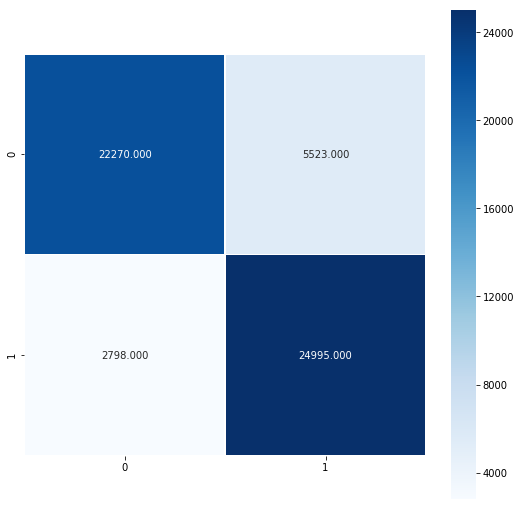

In [63]:
#confusion matrix visualization of train data
cm_lr = confusion_matrix(y_train, preds_train)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [64]:
#Predictions and Evaluations
preds_test = logmodel_base.predict(X_test)
print(classification_report(y_test, preds_test))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      6958
           1       0.90      0.89      0.89     13574

   micro avg       0.86      0.86      0.86     20532
   macro avg       0.84      0.85      0.84     20532
weighted avg       0.86      0.86      0.86     20532



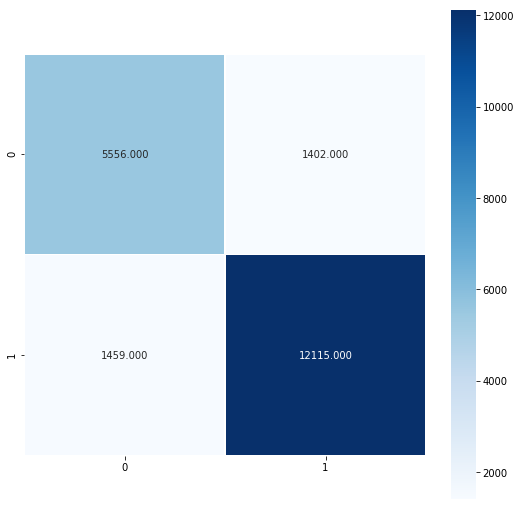

In [65]:
#confusion matrix visualization of test data
cm_lr = confusion_matrix(y_test, preds_test)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [66]:
# Model Accuracy, how often is the classifier correct?
print('Training F1 Score:', f1_score(y_train, preds_train))
print('Testing F1 Score:', f1_score(y_test, preds_test))

Training F1 Score: 0.8572996518667148
Testing F1 Score: 0.894392971835665


In [67]:
# pickling model
# pickle_model('logmodel1', logmodel_base)

In [68]:
# open pickled model and set to a variable
logmodel1_pkl = open('./EDA_logmodel1.pkl', 'rb')
logmodel1 = pickle.load(logmodel1_pkl)

In [69]:
# print pickled model info
print("Loaded logmodel1 Pickle :: ", logmodel1)

Loaded logmodel1 Pickle ::  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


#### KNN

In [70]:
# instantiate KNN model
knn = KNeighborsClassifier()

In [71]:
# Fit this KNN model to the training data.
knn_base = knn.fit(X_train, y_train)

In [72]:
# predict on training data
pred_train = knn_base.predict(X_train)

In [73]:
print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

[[23054  4739]
 [ 1490 26303]]
              precision    recall  f1-score   support

           0       0.94      0.83      0.88     27793
           1       0.85      0.95      0.89     27793

   micro avg       0.89      0.89      0.89     55586
   macro avg       0.89      0.89      0.89     55586
weighted avg       0.89      0.89      0.89     55586



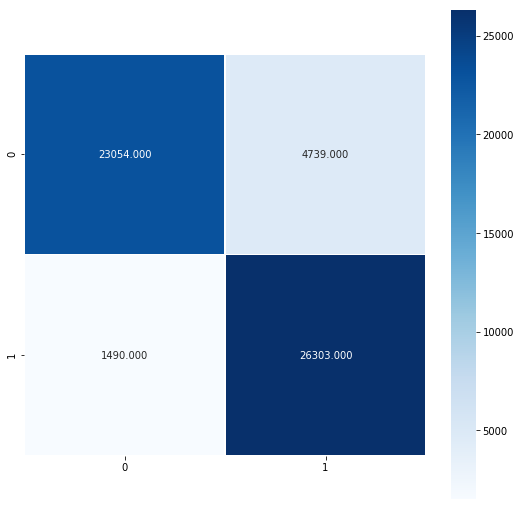

In [74]:
#confusion matrix visualization of train data
cm_lr = confusion_matrix(y_train, pred_train)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [75]:
#Predictions and Evaluations

pred_test = knn_base.predict(X_test)
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

[[ 5490  1468]
 [ 1174 12400]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      6958
           1       0.89      0.91      0.90     13574

   micro avg       0.87      0.87      0.87     20532
   macro avg       0.86      0.85      0.85     20532
weighted avg       0.87      0.87      0.87     20532



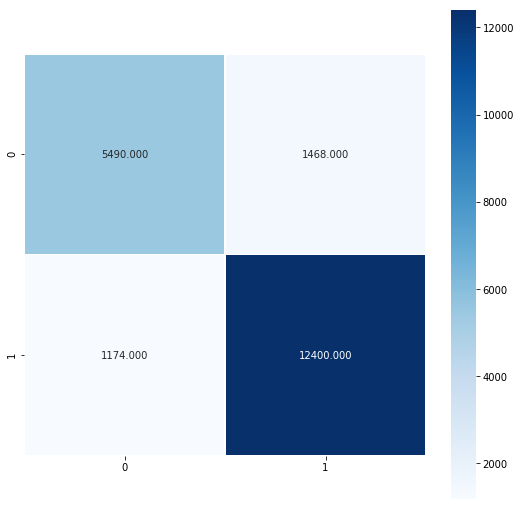

In [76]:
#confusion matrix visualization of train data
cm_lr = confusion_matrix(y_test, pred_test)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [77]:
# Model Accuracy, how often is the classifier correct?
print('Training F1 Score:', f1_score(y_train, pred_train))
print('Testing F1 Score:', f1_score(y_test, pred_test))

Training F1 Score: 0.8941276451092037
Testing F1 Score: 0.9037242183514321


In [78]:
# pickling model
pickle_model('knn_base2', knn_base)

In [79]:
# open pickled model and set to a variable
knn_base2_pkl = open('./EDA_knn_base2.pkl', 'rb')
base_knn2 = pickle.load(knn_base2_pkl)

In [80]:
# print pickled model info
print("Loaded KNN_base Pickle :: ", base_knn2)

Loaded KNN_base Pickle ::  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


#### Decision Tree Model

In [81]:
# Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.
dtree = DecisionTreeClassifier()
dtree_base = dtree.fit(X_train, y_train)

In [82]:
#predict the training set
predictions_train = dtree_base.predict(X_train)

In [83]:
#predict the testing set
predictions_test = dtree_base.predict(X_test)

In [84]:
# Model Accuracy, how often is the classifier correct?
print('Training F1 Score:', f1_score(y_train, predictions_train))
print('Testing F1 Score:', f1_score(y_test, predictions_test))

Training F1 Score: 0.9993519585253456
Testing F1 Score: 0.8653838797291611


In [85]:
# Predictions and Evaluation of Decision Tree on Training Set

print(classification_report(y_train, predictions_train))
print(confusion_matrix(y_train, predictions_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27793
           1       1.00      1.00      1.00     27793

   micro avg       1.00      1.00      1.00     55586
   macro avg       1.00      1.00      1.00     55586
weighted avg       1.00      1.00      1.00     55586

[[27792     1]
 [   35 27758]]


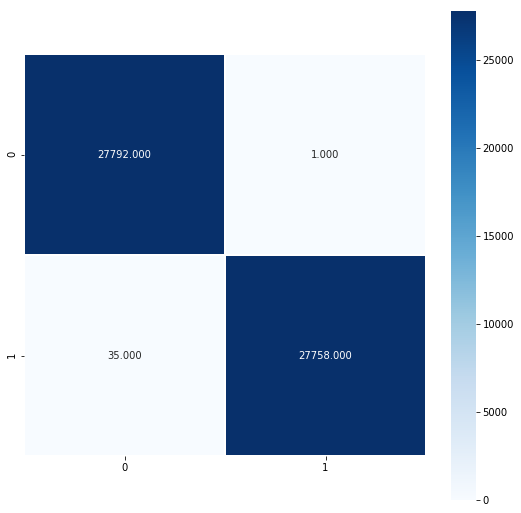

In [86]:
#confusion matrix visualization of train data
cm_lr = confusion_matrix(y_train, predictions_train)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [87]:
# Predictions and Evaluation of Decision Tree on Testing Set

print(classification_report(y_test, predictions_test))
print(confusion_matrix(y_test, predictions_test))

              precision    recall  f1-score   support

           0       0.72      0.82      0.76      6958
           1       0.90      0.83      0.87     13574

   micro avg       0.83      0.83      0.83     20532
   macro avg       0.81      0.83      0.81     20532
weighted avg       0.84      0.83      0.83     20532

[[ 5702  1256]
 [ 2263 11311]]


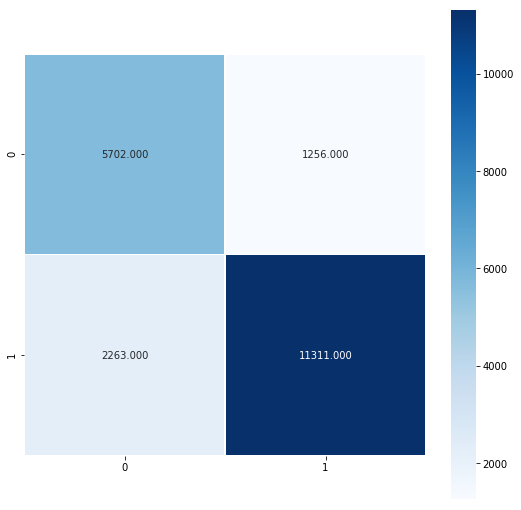

In [88]:
#confusion matrix visualization of train data
cm_lr = confusion_matrix(y_test, predictions_test)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [89]:
# pickling model
pickle_model('dtree1', dtree_base)

In [90]:
# open pickled model and set to a variable
dtree1_pkl = open('./EDA_dtree1.pkl', 'rb')
dtree1 = pickle.load(dtree1_pkl)

In [91]:
# print pickled model info
print("Loaded dtree1 Pickle :: ", dtree1)

Loaded dtree1 Pickle ::  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


#### Random Forest Model

In [92]:
# instantiate the Random Forest model
rfc = RandomForestClassifier(random_state = 23, n_estimators=100, max_depth=8, verbose=5)

In [93]:
rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=23, verbose=5, warm_start=False)

In [94]:
# fit the model to the training data
rfc_base = rfc.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.8s finished


In [96]:
# predict using model on training data
rfc_pred_train = rfc_base.predict(X_train)

# checking accuracy
print('Train Accuracy score: ', accuracy_score(y_train, rfc_pred_train))

# checking F1 score
print('Train F1 score: ', f1_score(y_train, rfc_pred_train))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Train Accuracy score:  0.8547655884575253
Train F1 score:  0.8658814147824497


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


In [97]:
# Predictions and Evaluation of Random Forest on Training Set

print(classification_report(y_train, rfc_pred_train))
print(confusion_matrix(y_train, rfc_pred_train))

              precision    recall  f1-score   support

           0       0.93      0.77      0.84     27793
           1       0.80      0.94      0.87     27793

   micro avg       0.85      0.85      0.85     55586
   macro avg       0.86      0.85      0.85     55586
weighted avg       0.86      0.85      0.85     55586

[[21453  6340]
 [ 1733 26060]]


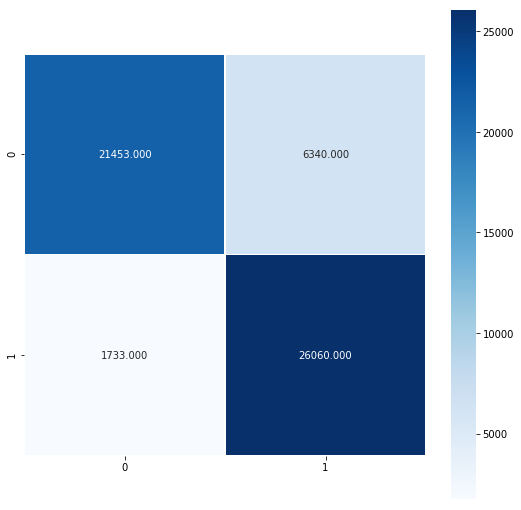

In [98]:
#confusion matrix visualization of train data
cm_lr = confusion_matrix(y_train, rfc_pred_train)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [99]:
# predict using model on testing data
rfc_pred_test = rfc_base.predict(X_test)


# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, rfc_pred_test))


# checking F1 score
print('Test F1 score: ', f1_score(y_test, rfc_pred_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Test Accuracy score:  0.8820377946619911
Test F1 score:  0.9132086289686805


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


In [100]:
# Predictions and Evaluation of Random Forest on Testing Set

print(classification_report(y_test, rfc_pred_test))
print(confusion_matrix(y_test, rfc_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82      6958
           1       0.89      0.94      0.91     13574

   micro avg       0.88      0.88      0.88     20532
   macro avg       0.88      0.86      0.86     20532
weighted avg       0.88      0.88      0.88     20532

[[ 5368  1590]
 [  832 12742]]


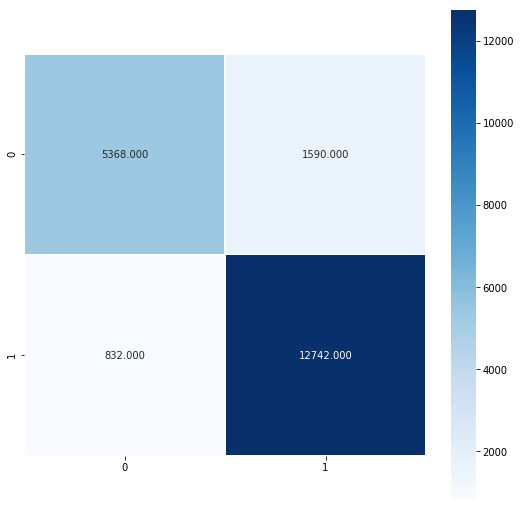

In [101]:
#confusion matrix visualization of test data
cm_lr = confusion_matrix(y_test, rfc_pred_test)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [102]:
# pickling model
pickle_model('forest1', rfc_base)

In [103]:
# open pickled model and set to a variable
rfc1_pkl = open('./EDA_forest1.pkl', 'rb')
rfc1 = pickle.load(rfc1_pkl)

In [104]:
# print pickled model info
print("Loaded rfc1 Pickle :: ", rfc1)

Loaded rfc1 Pickle ::  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=23, verbose=5, warm_start=False)


### Hyperparameter Tuning

#### Logistic Regression


In [105]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = C_param_range = [0.001,0.01,0.1, 0.5, 1, 2, 5, 10]

# Create hyperparameter options
hyperparameters_lr = dict(C=C, penalty=penalty)

In [106]:
#Use gridsearch with our pipeline to find best parameters

rs_lr = RandomizedSearchCV(estimator=logmodel,
                     param_distributions=hyperparameters_lr,
                     scoring='f1',
                     cv=5, verbose=5)

In [107]:
# Fit the gridsearch object to the data

logmodel_rs = rs_lr.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] penalty=l1, C=10 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... penalty=l1, C=10, score=0.8513651877133106, total=  11.2s
[CV] penalty=l1, C=10 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.4s remaining:    0.0s


[CV] ....... penalty=l1, C=10, score=0.8506896551724137, total=   9.5s
[CV] penalty=l1, C=10 ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   21.0s remaining:    0.0s


[CV] ........ penalty=l1, C=10, score=0.853258081067214, total=  15.6s
[CV] penalty=l1, C=10 ................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   36.7s remaining:    0.0s


[CV] ......... penalty=l1, C=10, score=0.85447377442578, total=  10.6s
[CV] penalty=l1, C=10 ................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   47.3s remaining:    0.0s


[CV] ....... penalty=l1, C=10, score=0.8558348449511963, total=  15.8s
[CV] penalty=l1, C=2 .................................................
[CV] ........ penalty=l1, C=2, score=0.8517350157728706, total=   7.4s
[CV] penalty=l1, C=2 .................................................
[CV] ........ penalty=l1, C=2, score=0.8517784859185255, total=  17.3s
[CV] penalty=l1, C=2 .................................................
[CV] ........ penalty=l1, C=2, score=0.8537481836054364, total=  12.6s
[CV] penalty=l1, C=2 .................................................
[CV] ........ penalty=l1, C=2, score=0.8545734840698869, total=   8.3s
[CV] penalty=l1, C=2 .................................................
[CV] ........ penalty=l1, C=2, score=0.8568715469613261, total=  21.3s
[CV] penalty=l2, C=0.01 ..............................................
[CV] ..... penalty=l2, C=0.01, score=0.8414339882799036, total=   0.8s
[CV] penalty=l2, C=0.01 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.2min finished


In [108]:
# Identify the best performing models and see how it performs on the test set.

# Best params
print('Best params: %s' % logmodel_rs.best_params_)

# Best training data accuracy
print('Best training accuracy: %.3f' % logmodel_rs.best_score_)

# Predict on test data with best params
y_pred = logmodel_rs.predict(X_test)

# Test data accuracy of model with best params
print('Test set F1 score for best params: %.3f ' % f1_score(y_test, y_pred))

Best params: {'penalty': 'l1', 'C': 1}
Best training accuracy: 0.854
Test set F1 score for best params: 0.895 


In [109]:
# pickling gridsearch
pickle_model('rs_log1_randsearch', logmodel_rs)

In [110]:
# open pickled model and set to a variable
rs_logmodel_pkl = open('./EDA_rs_log1_randsearch.pkl', 'rb')
log_rs = pickle.load(rs_logmodel_pkl)

In [111]:
# print pickled model info
print("Loaded rslr_base Pickle :: ", log_rs)

Loaded rslr_base Pickle ::  RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'C': [0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10], 'penalty': ['l1', 'l2']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='f1', verbose=5)


#### KNN

In [112]:
# Create the dictionary of hyperparameters we want to test

neighbors = list(range(1, 20, 2))
grid_params_KNN = {'n_neighbors': neighbors,
                    'weights': ['uniform', 'distance']}

In [113]:
# Use gridsearch with our pipeline to find best parameters

rs_KNN = RandomizedSearchCV(estimator=knn,
                      param_distributions=grid_params_KNN,
                      scoring='f1',
                      cv=5, verbose=5)

In [114]:
# Fit the randomized search object to the data

KNN_rs = rs_KNN.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] weights=distance, n_neighbors=1 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  weights=distance, n_neighbors=1, score=0.8103232720128595, total= 1.1min
[CV] weights=distance, n_neighbors=1 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.4min remaining:    0.0s


[CV]  weights=distance, n_neighbors=1, score=0.8161943319838056, total= 1.1min
[CV] weights=distance, n_neighbors=1 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  5.0min remaining:    0.0s


[CV]  weights=distance, n_neighbors=1, score=0.8092839150773661, total= 1.1min
[CV] weights=distance, n_neighbors=1 .................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  7.3min remaining:    0.0s


[CV]  weights=distance, n_neighbors=1, score=0.8079172289698605, total= 1.1min
[CV] weights=distance, n_neighbors=1 .................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  9.8min remaining:    0.0s


[CV]  weights=distance, n_neighbors=1, score=0.8174881048568093, total= 1.1min
[CV] weights=distance, n_neighbors=13 ................................
[CV]  weights=distance, n_neighbors=13, score=0.8691056239160955, total= 1.4min
[CV] weights=distance, n_neighbors=13 ................................
[CV]  weights=distance, n_neighbors=13, score=0.8726731198808636, total= 1.5min
[CV] weights=distance, n_neighbors=13 ................................
[CV]  weights=distance, n_neighbors=13, score=0.8674738489416028, total= 1.6min
[CV] weights=distance, n_neighbors=13 ................................
[CV]  weights=distance, n_neighbors=13, score=0.8747725392886684, total= 1.5min
[CV] weights=distance, n_neighbors=13 ................................
[CV]  weights=distance, n_neighbors=13, score=0.8759245408460067, total= 1.5min
[CV] weights=distance, n_neighbors=11 ................................
[CV]  weights=distance, n_neighbors=11, score=0.8664954006795392, total= 1.4min
[CV] weights=di

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 350.6min finished


In [116]:
# Identify the best performing models and see how it performs on the test set.

# Best params
print('Best params: %s' % KNN_rs.best_params_)
# Best training data accuracy
print('Best training accuracy: %.3f' % rs_KNN.best_score_)
# Predict on test data with best params
y_pred = rs_KNN.predict(X_test)
# Test data accuracy of model with best params
print('Test set F1 score for best params: %.3f ' % f1_score(y_test, y_pred))

Best params: {'weights': 'uniform', 'n_neighbors': 19}
Best training accuracy: 0.873
Test set F1 score for best params: 0.919 


In [126]:
# pickle model
# pickle_model('rs_knn1', KNN_rs)

#### Decision Tree Model

In [117]:
# Create the dictionary of hyperparameters we want to test

tree_depth_range = list(range(1, 10))
max_features_range = list(range(1, 5))
grid_params_dt = {'max_depth': tree_depth_range,
                   'max_features': max_features_range,
                   'min_samples_leaf':[.01,.05,.1],
                  'criterion': ['gini', 'entropy']}

In [118]:
# Use randomizedsearch with our pipeline to find best parameters

rs_dt = RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                     param_distributions=grid_params_dt,
                     scoring='f1',
                     cv=5, verbose=5)

In [119]:
# Fit the randomized search object to the data
rs_dtree = rs_dt.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] min_samples_leaf=0.05, max_features=4, max_depth=3, criterion=gini 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  min_samples_leaf=0.05, max_features=4, max_depth=3, criterion=gini, score=0.11199744735162732, total=   0.7s
[CV] min_samples_leaf=0.05, max_features=4, max_depth=3, criterion=gini 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  min_samples_leaf=0.05, max_features=4, max_depth=3, criterion=gini, score=0.650519464263362, total=   0.3s
[CV] min_samples_leaf=0.05, max_features=4, max_depth=3, criterion=gini 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV]  min_samples_leaf=0.05, max_features=4, max_depth=3, criterion=gini, score=0.10999200639488409, total=   0.3s
[CV] min_samples_leaf=0.05, max_features=4, max_depth=3, criterion=gini 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.7s remaining:    0.0s


[CV]  min_samples_leaf=0.05, max_features=4, max_depth=3, criterion=gini, score=0.6517627904064125, total=   0.3s
[CV] min_samples_leaf=0.05, max_features=4, max_depth=3, criterion=gini 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s remaining:    0.0s


[CV]  min_samples_leaf=0.05, max_features=4, max_depth=3, criterion=gini, score=0.11243828635132984, total=   0.3s
[CV] min_samples_leaf=0.01, max_features=1, max_depth=5, criterion=entropy 
[CV]  min_samples_leaf=0.01, max_features=1, max_depth=5, criterion=entropy, score=0.0, total=   0.3s
[CV] min_samples_leaf=0.01, max_features=1, max_depth=5, criterion=entropy 
[CV]  min_samples_leaf=0.01, max_features=1, max_depth=5, criterion=entropy, score=0.0, total=   0.3s
[CV] min_samples_leaf=0.01, max_features=1, max_depth=5, criterion=entropy 
[CV]  min_samples_leaf=0.01, max_features=1, max_depth=5, criterion=entropy, score=0.0, total=   0.3s
[CV] min_samples_leaf=0.01, max_features=1, max_depth=5, criterion=entropy 
[CV]  min_samples_leaf=0.01, max_features=1, max_depth=5, criterion=entropy, score=0.0, total=   0.4s
[CV] min_samples_leaf=0.01, max_features=1, max_depth=5, criterion=entropy 
[CV]  min_samples_leaf=0.01, max_features=1, max_depth=5, criterion=entropy, score=0.0, total=   

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   22.9s finished


In [61]:
# Identify the best performing models and see how it performs on the test set.

# Best params
print('Best params: %s' % rs_dtree.best_params_)

# Best training data accuracy
print('Best training accuracy: %.3f' % rs_dtree.best_score_)

# Predict on test data with best params
y_pred = rs_dtree.predict(X_test)

# Test data accuracy of model with best params
print('Test set F1 score for best params: %.3f ' % f1_score(y_test, y_pred))

Best params: {'min_samples_leaf': 0.01, 'max_features': 4, 'max_depth': 1, 'criterion': 'gini'}
Best training accuracy: 0.667
Test set F1 score for best params: 0.798 


In [120]:
# Predict on train data with best params
y_pred_train = rs_dtree.predict(X_train)

In [123]:
# pickling model
# pickle_model('rs_dtree1', rs_dtree)

In [124]:
# open pickled model and set to a variable
rs_dtree1_pkl = open('./EDA_rs_dtree1.pkl', 'rb')
dtree1_rs = pickle.load(rs_dtree1_pkl)

In [125]:
# print pickled model info
print("Loaded Decision Tree RS Pickle :: ", dtree1_rs)

Loaded Decision Tree RS Pickle ::  RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'max_features': [1, 2, 3, 4], 'min_samples_leaf': [0.01, 0.05, 0.1], 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='f1', verbose=5)


#### Random Forest Model

In [127]:
param_distributions = { 
    'n_estimators': [100, 200, 300,400],
    'max_features': [0.10, 0.25, 0.35, 0.5, 0.75],
    'max_depth' : range(3,9,1),
    'min_samples_leaf': [0.03,0.04,0.05,0.06]
}

In [128]:
CV_rfc = RandomizedSearchCV(estimator=rfc, param_distributions=param_distributions, cv= 3,n_jobs=-1, verbose=5)

In [129]:
rfc_rs = CV_rfc.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 51.2min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 53.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 53.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 400
building tree 2 of 400


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s


building tree 3 of 400
building tree 4 of 400


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s


building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 4

building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   48.4s finished


In [130]:
rfc_rs.best_params_


{'n_estimators': 400,
 'min_samples_leaf': 0.04,
 'max_features': 0.35,
 'max_depth': 7}

In [131]:
# predict on test set
rfc_pred = rfc_rs.best_estimator_.predict(X_test)

# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, rfc_pred))

# checking accuracy
print('Test F1 score: ', f1_score(y_test, rfc_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Test Accuracy score:  0.8960159750633158
Test F1 score:  0.9251691142967299


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.7s finished


In [132]:
# predict on train set
rfc_pred_train = rfc_rs.best_estimator_.predict(X_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.8s finished


In [133]:
# checking accuracy
print('Train Accuracy score: ', accuracy_score(y_train, rfc_pred_train))

# checking accuracy
print('Train F1 score: ', f1_score(y_train, rfc_pred_train))

Train Accuracy score:  0.8596229266362033
Train F1 score:  0.8737112984932106


In [135]:
# pickling model
# pickle_model('rs_forest1', rfc_rs)

In [136]:
# open pickled model and set to a variable
rs_forest1_pkl = open('./EDA_rs_forest1.pkl', 'rb')
forest1_rs = pickle.load(rs_forest1_pkl)

In [137]:
# print pickled model info
print("Loaded Forest RS Pickle :: ", forest1_rs)

Loaded Forest RS Pickle ::  RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=23, verbose=5, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400], 'max_features': [0.1, 0.25, 0.35, 0.5, 0.75], 'max_depth': range(3, 9), 'min_samples_leaf': [0.03, 0.04, 0.05, 0.06]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=5)


# One Model

In [138]:
# instantiate the Random Forest model
rfc2 = RandomForestClassifier(random_state = 23, n_estimators = 200, min_samples_leaf = 0.05, max_features = 0.35, max_depth = 4, verbose=5)

In [139]:
# fit the model to the training data
rfc2_model = rfc2.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s


building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 20

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   21.8s finished


In [140]:
# predict using model on training data
rfc2_pred_train = rfc2_model.predict(X_train)

# checking accuracy
print('Train Accuracy score: ', accuracy_score(y_train, rfc2_pred_train))

# checking F1 score
print('Train F1 score: ', f1_score(y_train, rfc2_pred_train))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Train Accuracy score:  0.8596229266362033
Train F1 score:  0.8737112984932106


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.9s finished


In [141]:
# Predictions and Evaluation of Random Forest on Training Set

print(classification_report(y_train, rfc2_pred_train))
print(confusion_matrix(y_train, rfc2_pred_train))

              precision    recall  f1-score   support

           0       0.96      0.75      0.84     27793
           1       0.79      0.97      0.87     27793

   micro avg       0.86      0.86      0.86     55586
   macro avg       0.88      0.86      0.86     55586
weighted avg       0.88      0.86      0.86     55586

[[20791  7002]
 [  801 26992]]


Text(0.5, 1.0, 'Confusion Matrix of Random Forest on Training Data')

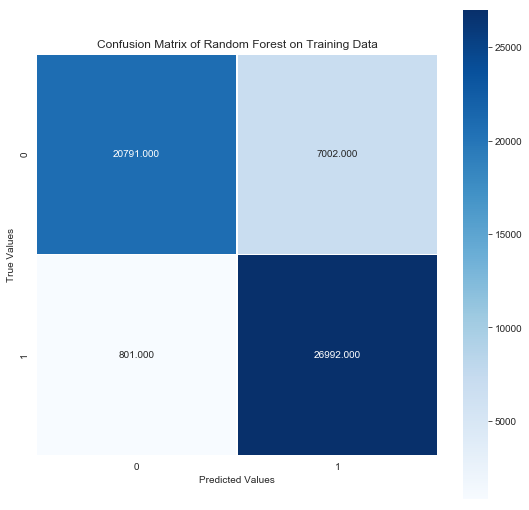

In [142]:
#confusion matrix visualization of train data
cm_lr2 = confusion_matrix(y_train, rfc2_pred_train)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr2, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.title('Confusion Matrix of Random Forest on Training Data')

In [143]:
# predict using model on testing data
rfc2_pred_test = rfc2_model.predict(X_test)


# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, rfc2_pred_test))


# checking F1 score
print('Test F1 score: ', f1_score(y_test, rfc2_pred_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Test Accuracy score:  0.8960159750633158
Test F1 score:  0.9251691142967299


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.4s finished


In [144]:
# Predictions and Evaluation of Random Forest on Testing Set

print(classification_report(y_test, rfc2_pred_test))
print(confusion_matrix(y_test, rfc2_pred_test))

              precision    recall  f1-score   support

           0       0.93      0.75      0.83      6958
           1       0.88      0.97      0.93     13574

   micro avg       0.90      0.90      0.90     20532
   macro avg       0.91      0.86      0.88     20532
weighted avg       0.90      0.90      0.89     20532

[[ 5199  1759]
 [  376 13198]]


Text(0.5, 1.0, 'Confusion Matrix of Random Forest on Testing Data')

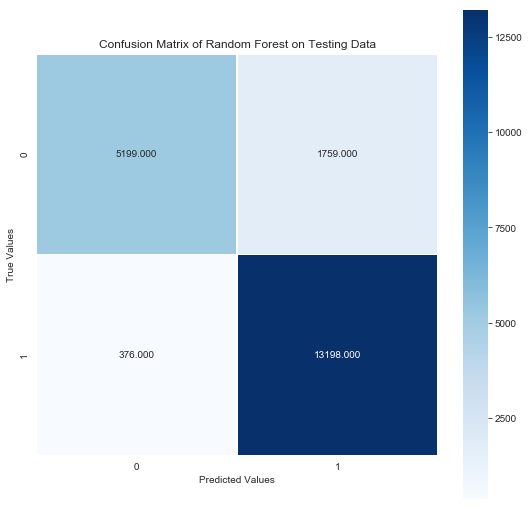

In [145]:
#confusion matrix visualization of test data
cm_lr2 = confusion_matrix(y_test, rfc2_pred_test)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr2, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Confusion Matrix of Random Forest on Testing Data')

In [182]:
# pickling model
# pickle_model('forest_model2', rfc2_model)

# Final Model

In [146]:
# instantiate the Random Forest model
rfc1 = RandomForestClassifier(random_state = 23, n_estimators = 400, min_samples_leaf = 0.04, max_features = 0.35, max_depth = 7, verbose=5)

In [147]:
# fit the model to the training data
rfc1_model = rfc1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 400
building tree 2 of 400


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s


building tree 3 of 400
building tree 4 of 400


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s


building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 4

building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   53.0s finished


In [148]:
# predict using model on training data
rfc1_pred_train = rfc1_model.predict(X_train)

# checking accuracy
print('Train Accuracy score: ', accuracy_score(y_train, rfc1_pred_train))

# checking F1 score
print('Train F1 score: ', f1_score(y_train, rfc1_pred_train))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Train Accuracy score:  0.8596229266362033
Train F1 score:  0.8737112984932106


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    2.0s finished


In [155]:
# Predictions and Evaluation of Random Forest on Training Set

print(classification_report(y_train, rfc1_pred_train))
print(confusion_matrix(y_train, rfc1_pred_train))

              precision    recall  f1-score   support

           0       0.96      0.75      0.84     27793
           1       0.79      0.97      0.87     27793

   micro avg       0.86      0.86      0.86     55586
   macro avg       0.88      0.86      0.86     55586
weighted avg       0.88      0.86      0.86     55586

[[20791  7002]
 [  801 26992]]


Text(0.5, 1.0, 'Confusion Matrix of Random Forest on Training Data')

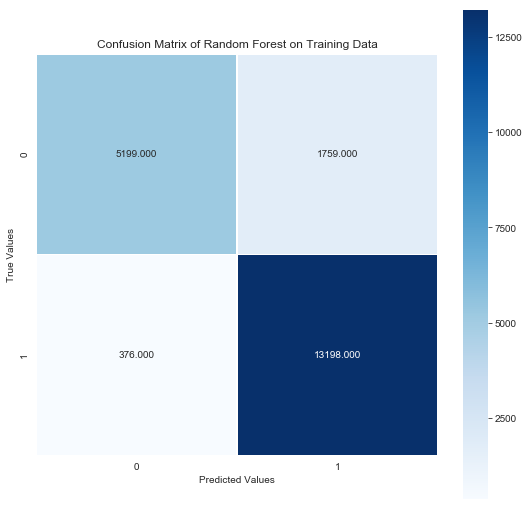

In [156]:
#confusion matrix visualization of train data
cm_lr1 = confusion_matrix(y_train, rfc1_pred_train)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr2, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.title('Confusion Matrix of Random Forest on Training Data')

In [151]:
# predict using model on testing data
rfc1_pred_test = rfc1_model.predict(X_test)


# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, rfc1_pred_test))


# checking F1 score
print('Test F1 score: ', f1_score(y_test, rfc1_pred_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Test Accuracy score:  0.8960159750633158
Test F1 score:  0.9251691142967299


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.8s finished


In [152]:
# Predictions and Evaluation of Random Forest on Testing Set

print(classification_report(y_test, rfc1_pred_test))
print(confusion_matrix(y_test, rfc1_pred_test))

              precision    recall  f1-score   support

           0       0.93      0.75      0.83      6958
           1       0.88      0.97      0.93     13574

   micro avg       0.90      0.90      0.90     20532
   macro avg       0.91      0.86      0.88     20532
weighted avg       0.90      0.90      0.89     20532

[[ 5199  1759]
 [  376 13198]]


Text(0.5, 1.0, 'Confusion Matrix of Random Forest on Testing Data')

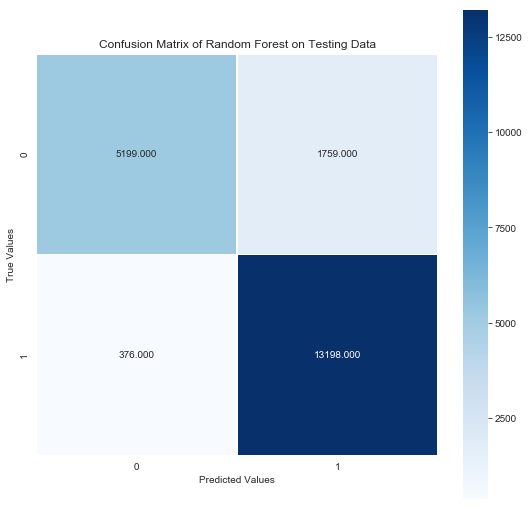

In [153]:
#confusion matrix visualization of test data
cm_lr1 = confusion_matrix(y_test, rfc1_pred_test)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr1, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Confusion Matrix of Random Forest on Testing Data')

In [154]:
# pickling model
# pickle_model('forest_model1', rfc1_model)